### Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import concatenate

In [3]:
%run '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/Utilities.ipynb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 9.6 MB/s 


In [4]:
MODELS_FOLDER = "/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch"

In [5]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/split.zip" -d "/content"

## Creation training, validation and test sets

In [6]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 300
IMAGE_WIDTH = 300

In [7]:
class_weights = compute_class_weights("split/train")
class_weights

{0: 2.610930735930736,
 1: 0.6807279909706546,
 2: 0.8620176274416389,
 3: 4.736583769633508,
 4: 0.5002419131877246,
 5: 0.43916868932038833,
 6: 3.604332669322709,
 7: 4.47865099009901}

In [8]:
root_dir = 'split'
training_dir = os.path.join(root_dir, 'train')
validation_dir = os.path.join(root_dir, 'val')
test_dir = os.path.join(root_dir, 'test')

training_dataset = tf.keras.utils.image_dataset_from_directory(
                      training_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                      batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
                      validation_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=True,
                      image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                      batch_size=BATCH_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(
                      test_dir,
                      label_mode="categorical",
                      labels="inferred",
                      shuffle=False,
                      image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                      batch_size=BATCH_SIZE)

Found 14475 files belonging to 8 classes.
Found 2529 files belonging to 8 classes.
Found 2540 files belonging to 8 classes.


# CNN from Scratch experiments

---



In [9]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomContrast(0.15),
  layers.RandomZoom(0.2, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

### Zero Model


Dense layer of 256 neurons without dropout.


In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(300, 300, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((5, 5))) 

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 1.9356 - accuracy: 0.2705
Epoch 1: val_loss improved from inf to 1.86713, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 78s 140ms/step - loss: 1.9356 - accuracy: 0.2705 - val_loss: 1.8671 - val_accuracy: 0.2989
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.6482 - accuracy: 0.3693
Epoch 2: val_loss improved from 1.86713 to 1.68614, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.6487 - accuracy: 0.3692 - val_loss: 1.6861 - val_accuracy: 0.3729
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.5388 - accuracy: 0.4176
Epoch 3: val_loss improved from 1.68614 to 1.48213, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 63s 138ms/step - loss: 1.5385 - accuracy: 0.4175 - val_loss: 1.4821 - val_accuracy: 0.4263
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.4714 - accuracy: 0.4331
Epoch 4: val_loss improved from 1.48213 to 1.41538, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.4718 - accuracy: 0.4331 - val_loss: 1.4154 - val_accuracy: 0.4856
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.4168 - accuracy: 0.4502
Epoch 5: val_loss did not improve from 1.41538
453/453 [==============================] - 65s 142ms/step - loss: 1.4165 - accuracy: 0.4502 - val_loss: 1.4574 - val_accuracy: 0.4417
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.3950 - accuracy: 0.4562
Epoch 6: val_loss did not improve from 1.41538
453/453 [==============================] - 63s 138ms/step - loss: 1.3947 - accuracy: 0.4564 - val_loss: 1.4909 - val_accuracy: 0.4417
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.3701 - accuracy: 0.4651
Epoch 7: val_loss improved from 1.41538 to 1.31835, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.3698 - accuracy: 0.4650 - val_loss: 1.3183 - val_accuracy: 0.5030
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.3431 - accuracy: 0.4698
Epoch 8: val_loss did not improve from 1.31835
453/453 [==============================] - 62s 135ms/step - loss: 1.3432 - accuracy: 0.4697 - val_loss: 1.3543 - val_accuracy: 0.4875
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.3221 - accuracy: 0.4783
Epoch 9: val_loss did not improve from 1.31835
453/453 [==============================] - 63s 138ms/step - loss: 1.3227 - accuracy: 0.4782 - val_loss: 1.3486 - val_accuracy: 0.4951
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3152 - accuracy: 0.4766
Epoch 10: val_loss improved from 1.31835 to 1.28074, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5
453/453 [==============================] - 62s 135ms/step - loss: 1.3156 - accuracy: 0.4766 - val_loss: 1.2807 - val_accuracy: 0.5215
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.2946 - accuracy: 0.4815
Epoch 11: val_loss did not improve from 1.28074
453/453 [==============================] - 61s 134ms/step - loss: 1.2948 - accuracy: 0.4815 - val_loss: 1.4673 - val_accuracy: 0.4361
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.2884 - accuracy: 0.4873
Epoch 12: val_loss did not improve from 1.28074
453/453 [==============================] - 62s 135ms/step - loss: 1.2901 - accuracy: 0.4872 - val_loss: 1.3061 - val_accuracy: 0.5188
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.2577 - accuracy: 0.4978
Epoch 13: val_loss did not improve from 1.28074
453/453 [==============================] - 62s 134ms/step - loss: 1.2573 - accuracy: 0.4978 - val_loss: 1.4438 - val_accuracy: 0.4607
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.2345 - accuracy: 0.5024
Epoch 14: val_loss did not improve from 1.28074
453/453 [==============================] - 62s 135ms/step - loss: 1.2344 - accuracy: 0.5024 - val_loss: 1.3574 - val_accuracy: 0.5085
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.2206 - accuracy: 0.5089
Epoch 15: val_loss did not improve from 1.28074
453/453 [==============================] - 62s 135ms/step - loss: 1.2201 - accuracy: 0.5090 - val_loss: 1.3792 - val_accuracy: 0.4856
Epoch 15: early stopping


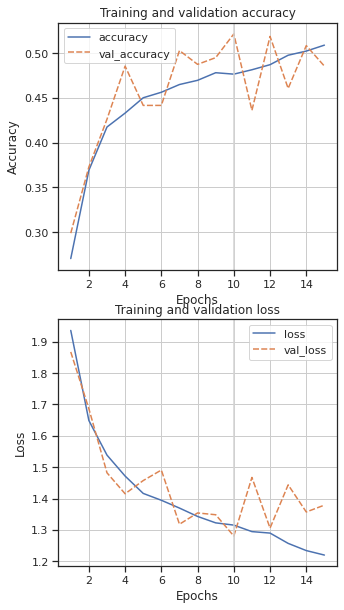

In [ ]:
history = run_model(model, 'experiment_01', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 7s 86ms/step - loss: 1.2573 - accuracy: 0.5307
Test loss: 1.257
Test accuracy: 0.531
Precision: 0.35678034576441253
Recall: 0.43300507188222864
F1-Score: 0.3457091533885708
Accuracy on Test Data: 0.53%

              precision    recall  f1-score   support

           0       0.26      0.66      0.37        88
           1       0.64      0.34      0.44       333
           2       0.42      0.29      0.34       263
           3       0.06      0.08      0.07        25
           4       0.40      0.53      0.46       453
           5       0.85      0.63      0.73      1288
           6       0.13      0.47      0.20        64
           7       0.09      0.46      0.15        26

    accuracy                           0.53      2540
   macro avg       0.36      0.43      0.35      2540
weighted avg       0.64      0.53      0.56      2540



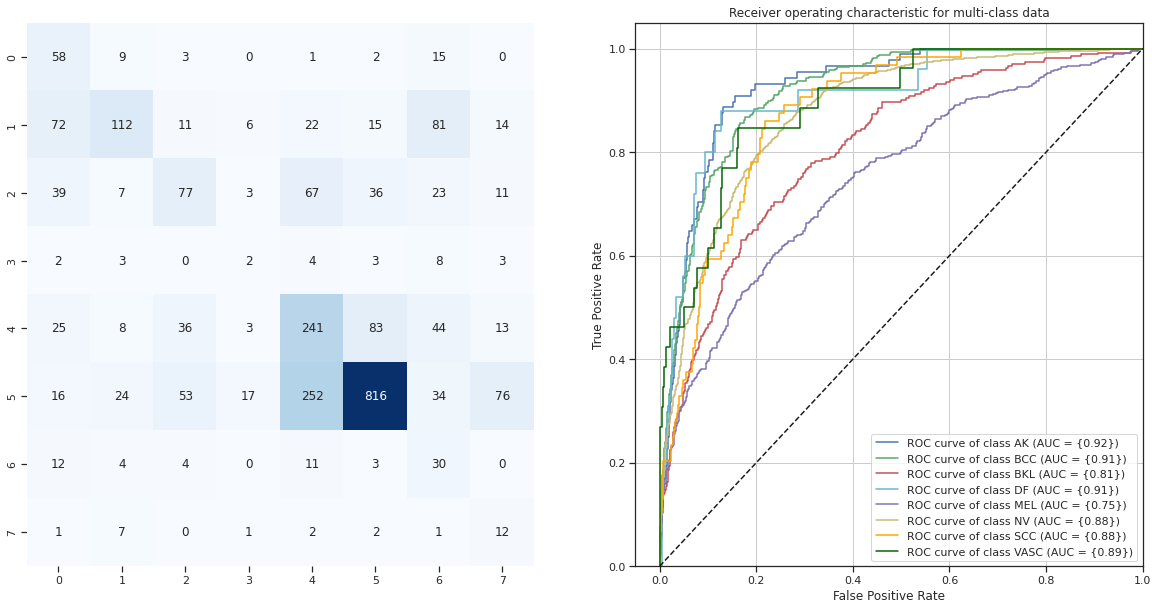

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_01.h5')
#model.summary()
evaluate_model(model)

### First Model


Dense layer of 256 neurons with dropout.


In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(300, 300, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))   

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                 

In [ ]:
model = compile_model(model)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 2.0040 - accuracy: 0.2357
Epoch 1: val_loss improved from inf to 1.81005, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 81s 145ms/step - loss: 2.0040 - accuracy: 0.2357 - val_loss: 1.8101 - val_accuracy: 0.3381
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.7591 - accuracy: 0.3196
Epoch 2: val_loss improved from 1.81005 to 1.64710, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.7594 - accuracy: 0.3196 - val_loss: 1.6471 - val_accuracy: 0.3788
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.6462 - accuracy: 0.3715
Epoch 3: val_loss improved from 1.64710 to 1.54521, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.6459 - accuracy: 0.3714 - val_loss: 1.5452 - val_accuracy: 0.4298
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5762 - accuracy: 0.4062
Epoch 4: val_loss improved from 1.54521 to 1.50157, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.5764 - accuracy: 0.4064 - val_loss: 1.5016 - val_accuracy: 0.4302
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.5143 - accuracy: 0.4233
Epoch 5: val_loss improved from 1.50157 to 1.42090, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.5139 - accuracy: 0.4233 - val_loss: 1.4209 - val_accuracy: 0.4860
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.4837 - accuracy: 0.4330
Epoch 6: val_loss did not improve from 1.42090
453/453 [==============================] - 60s 131ms/step - loss: 1.4833 - accuracy: 0.4330 - val_loss: 1.5176 - val_accuracy: 0.4251
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4580 - accuracy: 0.4367
Epoch 7: val_loss improved from 1.42090 to 1.38357, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.4577 - accuracy: 0.4365 - val_loss: 1.3836 - val_accuracy: 0.4828
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.4149 - accuracy: 0.4495
Epoch 8: val_loss improved from 1.38357 to 1.37845, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 61s 132ms/step - loss: 1.4149 - accuracy: 0.4495 - val_loss: 1.3785 - val_accuracy: 0.4729
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
453/453 [==============================] - ETA: 0s - loss: 1.3989 - accuracy: 0.4501
Epoch 9: val_loss did not improve from 1.37845
453/453 [==============================] - 60s 131ms/step - loss: 1.3989 - accuracy: 0.4501 - val_loss: 1.4219 - val_accuracy: 0.4682
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3931 - accuracy: 0.4497
Epoch 10: val_loss improved from 1.37845 to 1.33386, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
453/453 [==============================] - 61s 134ms/step - loss: 1.3932 - accuracy: 0.4497 - val_loss: 1.3339 - val_accuracy: 0.4927
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3781 - accuracy: 0.4542
Epoch 11: val_loss did not improve from 1.33386
453/453 [==============================] - 61s 133ms/step - loss: 1.3784 - accuracy: 0.4541 - val_loss: 1.4811 - val_accuracy: 0.4452
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.3713 - accuracy: 0.4572
Epoch 12: val_loss did not improve from 1.33386
453/453 [==============================] - 61s 133ms/step - loss: 1.3726 - accuracy: 0.4571 - val_loss: 1.4183 - val_accuracy: 0.4745
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.3341 - accuracy: 0.4730
Epoch 13: val_loss did not improve from 1.33386
453/453 [==============================] - 60s 132ms/step - loss: 1.3336 - accuracy: 0.4729 - val_loss: 1.5091 - val_accuracy: 0.4444
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.3198 - accuracy: 0.4710
Epoch 14: val_loss did not improve from 1.33386
453/453 [==============================] - 60s 132ms/step - loss: 1.3196 - accuracy: 0.4712 - val_loss: 1.3375 - val_accuracy: 0.5053
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.3088 - accuracy: 0.4676
Epoch 15: val_loss did not improve from 1.33386
453/453 [==============================] - 60s 132ms/step - loss: 1.3083 - accuracy: 0.4676 - val_loss: 1.3346 - val_accuracy: 0.5049
Epoch 15: early stopping


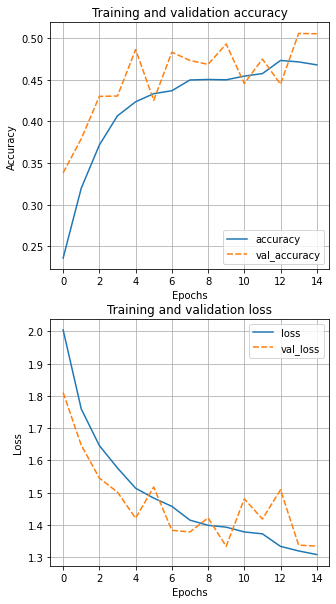

In [ ]:
history = run_model(model, 'experiment_1', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 8s 92ms/step - loss: 1.3095 - accuracy: 0.4976
Test loss: 1.310
Test accuracy: 0.498
Precision: 0.33029279325688865
Recall: 0.4038476784305868
F1-Score: 0.31865678018484717
Accuracy on Test Data: 0.50%

              precision    recall  f1-score   support

           0       0.21      0.59      0.31        88
           1       0.61      0.35      0.44       333
           2       0.35      0.24      0.28       263
           3       0.00      0.00      0.00        25
           4       0.36      0.58      0.44       453
           5       0.87      0.57      0.69      1288
           6       0.12      0.41      0.18        64
           7       0.13      0.50      0.21        26

    accuracy                           0.50      2540
   macro avg       0.33      0.40      0.32      2540
weighted avg       0.63      0.50      0.53      2540



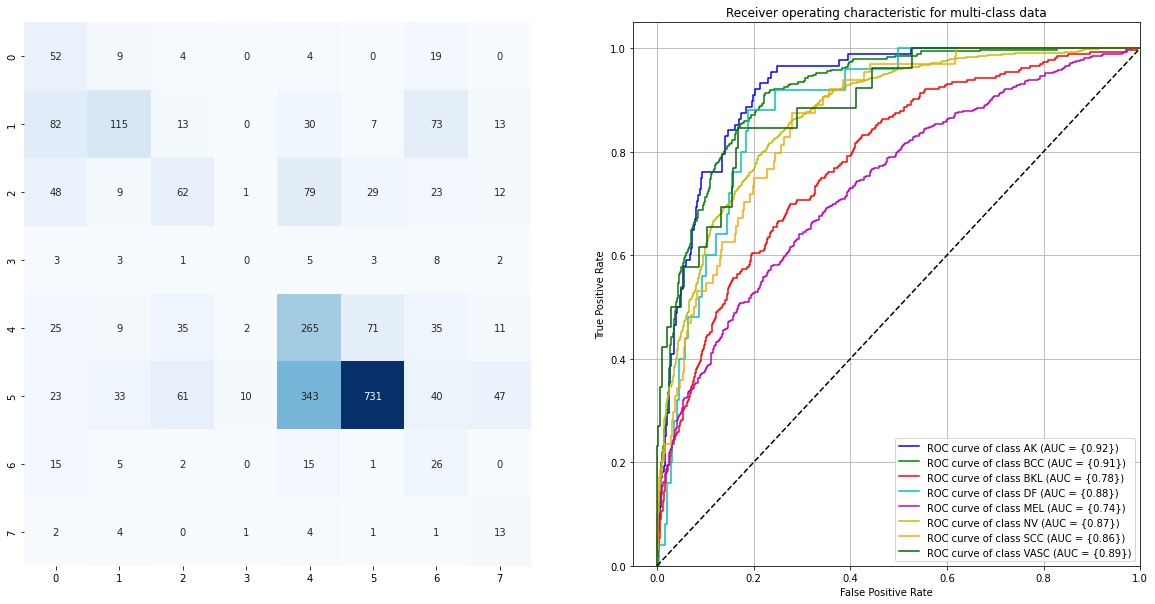

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5')
#model.summary()
evaluate_model(model)

### Second Model

In this second experiment we added the dropout with a rate of 0.5 before and after the dense layer.

In [ ]:
model2 = models.Sequential()
model2.add(layers.InputLayer(input_shape=(300, 300, 3)))
model2.add(data_augmentation)
model2.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))

model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((5, 5)))   

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(8, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model2)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/453           ETA: ?s - 

Epoch 1/50
453/453 [==============================] - ETA: 0s - loss: 2.0164 - accuracy: 0.2339
Epoch 1: val_loss improved from inf to 1.88822, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 83s 146ms/step - loss: 2.0164 - accuracy: 0.2339 - val_loss: 1.8882 - val_accuracy: 0.2942 - lr: 1.0000e-04
Epoch 2/50


0/453           ETA: ?s - 

Epoch 2/50
452/453 [============================>.] - ETA: 0s - loss: 1.8228 - accuracy: 0.3012
Epoch 2: val_loss improved from 1.88822 to 1.76138, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 132ms/step - loss: 1.8230 - accuracy: 0.3012 - val_loss: 1.7614 - val_accuracy: 0.3405 - lr: 1.0000e-04
Epoch 3/50


0/453           ETA: ?s - 

Epoch 3/50
452/453 [============================>.] - ETA: 0s - loss: 1.6877 - accuracy: 0.3378
Epoch 3: val_loss improved from 1.76138 to 1.62497, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 132ms/step - loss: 1.6873 - accuracy: 0.3379 - val_loss: 1.6250 - val_accuracy: 0.3883 - lr: 1.0000e-04
Epoch 4/50


0/453           ETA: ?s - 

Epoch 4/50
452/453 [============================>.] - ETA: 0s - loss: 1.6007 - accuracy: 0.3814
Epoch 4: val_loss improved from 1.62497 to 1.49015, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.6013 - accuracy: 0.3813 - val_loss: 1.4902 - val_accuracy: 0.4377 - lr: 1.0000e-04
Epoch 5/50


0/453           ETA: ?s - 

Epoch 5/50
452/453 [============================>.] - ETA: 0s - loss: 1.5413 - accuracy: 0.4116
Epoch 5: val_loss did not improve from 1.49015
453/453 [==============================] - 60s 131ms/step - loss: 1.5409 - accuracy: 0.4116 - val_loss: 1.5171 - val_accuracy: 0.4227 - lr: 1.0000e-04
Epoch 6/50


0/453           ETA: ?s - 

Epoch 6/50
452/453 [============================>.] - ETA: 0s - loss: 1.5125 - accuracy: 0.4155
Epoch 6: val_loss did not improve from 1.49015
453/453 [==============================] - 60s 131ms/step - loss: 1.5121 - accuracy: 0.4156 - val_loss: 1.6276 - val_accuracy: 0.3571 - lr: 1.0000e-04
Epoch 7/50


0/453           ETA: ?s - 

Epoch 7/50
452/453 [============================>.] - ETA: 0s - loss: 1.4812 - accuracy: 0.4287
Epoch 7: val_loss improved from 1.49015 to 1.45116, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.4809 - accuracy: 0.4288 - val_loss: 1.4512 - val_accuracy: 0.4484 - lr: 1.0000e-04
Epoch 8/50


0/453           ETA: ?s - 

Epoch 8/50
452/453 [============================>.] - ETA: 0s - loss: 1.4466 - accuracy: 0.4401
Epoch 8: val_loss did not improve from 1.45116
453/453 [==============================] - 61s 133ms/step - loss: 1.4466 - accuracy: 0.4401 - val_loss: 1.4616 - val_accuracy: 0.4385 - lr: 1.0000e-04
Epoch 9/50


0/453           ETA: ?s - 

Epoch 9/50
452/453 [============================>.] - ETA: 0s - loss: 1.4175 - accuracy: 0.4433
Epoch 9: val_loss did not improve from 1.45116
453/453 [==============================] - 60s 132ms/step - loss: 1.4182 - accuracy: 0.4434 - val_loss: 1.4695 - val_accuracy: 0.4350 - lr: 1.0000e-04
Epoch 10/50


0/453           ETA: ?s - 

Epoch 10/50
452/453 [============================>.] - ETA: 0s - loss: 1.4170 - accuracy: 0.4441
Epoch 10: val_loss improved from 1.45116 to 1.43077, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.4175 - accuracy: 0.4440 - val_loss: 1.4308 - val_accuracy: 0.4504 - lr: 1.0000e-04
Epoch 11/50


0/453           ETA: ?s - 

Epoch 11/50
452/453 [============================>.] - ETA: 0s - loss: 1.4027 - accuracy: 0.4515
Epoch 11: val_loss did not improve from 1.43077
453/453 [==============================] - 60s 131ms/step - loss: 1.4031 - accuracy: 0.4515 - val_loss: 1.4951 - val_accuracy: 0.4365 - lr: 1.0000e-04
Epoch 12/50


0/453           ETA: ?s - 

Epoch 12/50
452/453 [============================>.] - ETA: 0s - loss: 1.3988 - accuracy: 0.4466
Epoch 12: val_loss improved from 1.43077 to 1.40931, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 63s 137ms/step - loss: 1.4003 - accuracy: 0.4465 - val_loss: 1.4093 - val_accuracy: 0.4638 - lr: 1.0000e-04
Epoch 13/50


0/453           ETA: ?s - 

Epoch 13/50
452/453 [============================>.] - ETA: 0s - loss: 1.3571 - accuracy: 0.4608
Epoch 13: val_loss did not improve from 1.40931
453/453 [==============================] - 60s 132ms/step - loss: 1.3567 - accuracy: 0.4607 - val_loss: 1.4866 - val_accuracy: 0.4286 - lr: 1.0000e-04
Epoch 14/50


0/453           ETA: ?s - 

Epoch 14/50
452/453 [============================>.] - ETA: 0s - loss: 1.3526 - accuracy: 0.4628
Epoch 14: val_loss did not improve from 1.40931
453/453 [==============================] - 60s 132ms/step - loss: 1.3523 - accuracy: 0.4629 - val_loss: 1.4288 - val_accuracy: 0.4812 - lr: 1.0000e-04
Epoch 15/50


0/453           ETA: ?s - 

Epoch 15/50
452/453 [============================>.] - ETA: 0s - loss: 1.3504 - accuracy: 0.4618
Epoch 15: val_loss improved from 1.40931 to 1.35727, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.3499 - accuracy: 0.4619 - val_loss: 1.3573 - val_accuracy: 0.4927 - lr: 1.0000e-04
Epoch 16/50


0/453           ETA: ?s - 

Epoch 16/50
452/453 [============================>.] - ETA: 0s - loss: 1.3363 - accuracy: 0.4683
Epoch 16: val_loss improved from 1.35727 to 1.30647, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 63s 137ms/step - loss: 1.3370 - accuracy: 0.4680 - val_loss: 1.3065 - val_accuracy: 0.5263 - lr: 1.0000e-04
Epoch 17/50


0/453           ETA: ?s - 

Epoch 17/50
452/453 [============================>.] - ETA: 0s - loss: 1.3315 - accuracy: 0.4678
Epoch 17: val_loss did not improve from 1.30647
453/453 [==============================] - 60s 131ms/step - loss: 1.3311 - accuracy: 0.4680 - val_loss: 1.3706 - val_accuracy: 0.4852 - lr: 1.0000e-04
Epoch 18/50


0/453           ETA: ?s - 

Epoch 18/50
452/453 [============================>.] - ETA: 0s - loss: 1.3078 - accuracy: 0.4745
Epoch 18: val_loss improved from 1.30647 to 1.21740, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
453/453 [==============================] - 61s 133ms/step - loss: 1.3072 - accuracy: 0.4746 - val_loss: 1.2174 - val_accuracy: 0.5378 - lr: 1.0000e-04
Epoch 19/50


0/453           ETA: ?s - 

Epoch 19/50
452/453 [============================>.] - ETA: 0s - loss: 1.3090 - accuracy: 0.4774
Epoch 19: val_loss did not improve from 1.21740
453/453 [==============================] - 60s 131ms/step - loss: 1.3086 - accuracy: 0.4773 - val_loss: 1.2475 - val_accuracy: 0.5370 - lr: 1.0000e-04
Epoch 20/50


0/453           ETA: ?s - 

Epoch 20/50
452/453 [============================>.] - ETA: 0s - loss: 1.2971 - accuracy: 0.4781
Epoch 20: val_loss did not improve from 1.21740
453/453 [==============================] - 61s 133ms/step - loss: 1.2969 - accuracy: 0.4782 - val_loss: 1.3802 - val_accuracy: 0.4836 - lr: 1.0000e-04
Epoch 21/50


0/453           ETA: ?s - 

Epoch 21/50
452/453 [============================>.] - ETA: 0s - loss: 1.2883 - accuracy: 0.4847
Epoch 21: val_loss did not improve from 1.21740
453/453 [==============================] - 60s 131ms/step - loss: 1.2880 - accuracy: 0.4847 - val_loss: 1.2776 - val_accuracy: 0.5196 - lr: 1.0000e-04
Epoch 22/50


0/453           ETA: ?s - 

Epoch 22/50
452/453 [============================>.] - ETA: 0s - loss: 1.2461 - accuracy: 0.4987
Epoch 22: val_loss did not improve from 1.21740
453/453 [==============================] - 60s 131ms/step - loss: 1.2464 - accuracy: 0.4985 - val_loss: 1.2696 - val_accuracy: 0.5302 - lr: 1.0000e-05
Epoch 23/50


0/453           ETA: ?s - 

Epoch 23/50
452/453 [============================>.] - ETA: 0s - loss: 1.2370 - accuracy: 0.4979
Epoch 23: val_loss did not improve from 1.21740
453/453 [==============================] - 60s 132ms/step - loss: 1.2366 - accuracy: 0.4979 - val_loss: 1.2827 - val_accuracy: 0.5235 - lr: 1.0000e-05
Epoch 23: early stopping


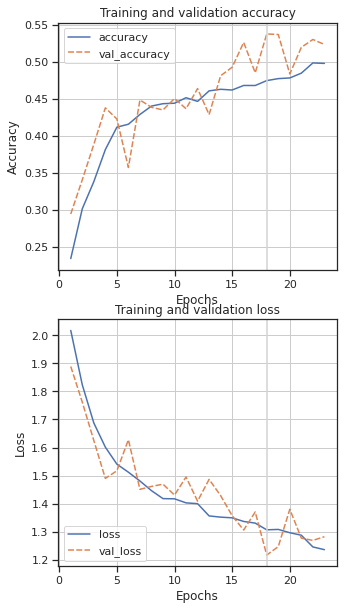

In [ ]:
history = run_model(model, 'experiment_2', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 7s 85ms/step - loss: 1.1985 - accuracy: 0.5531
Test loss: 1.198
Test accuracy: 0.553
Precision: 0.3747172782284786
Recall: 0.4583918369017796
F1-Score: 0.3842345068381962
Accuracy on Test Data: 0.55%

              precision    recall  f1-score   support

           0       0.30      0.55      0.39        88
           1       0.63      0.44      0.52       333
           2       0.34      0.42      0.38       263
           3       0.12      0.20      0.15        25
           4       0.40      0.58      0.47       453
           5       0.86      0.62      0.72      1288
           6       0.22      0.25      0.23        64
           7       0.13      0.62      0.22        26

    accuracy                           0.55      2540
   macro avg       0.37      0.46      0.38      2540
weighted avg       0.64      0.55      0.58      2540



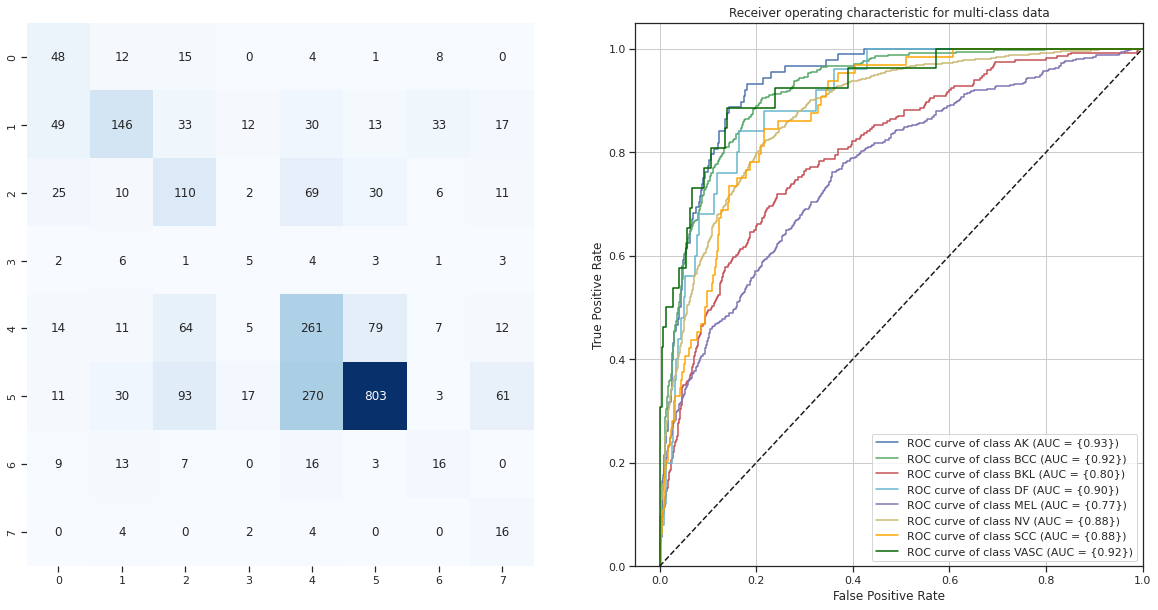

In [ ]:
from tensorflow.keras.models import load_model
model2_1 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5')
#model2.summary()
evaluate_model(model2_1)

### Third Model

In [10]:
model3 = models.Sequential()
model3.add(layers.InputLayer(input_shape=(300, 300, 3)))
model3.add(data_augmentation)
model3.add(layers.Rescaling(1./255))

model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(8, activation='softmax'))

In [11]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                  

In [12]:
model = compile_model(model3)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/453           ETA: ?s - 

Epoch 1/50
452/453 [============================>.] - ETA: 0s - loss: 1.9842 - accuracy: 0.2640
Epoch 1: val_loss improved from inf to 1.89308, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 65s 140ms/step - loss: 1.9835 - accuracy: 0.2639 - val_loss: 1.8931 - val_accuracy: 0.2297 - lr: 1.0000e-04
Epoch 2/50


0/453           ETA: ?s - 

Epoch 2/50
452/453 [============================>.] - ETA: 0s - loss: 1.7024 - accuracy: 0.3614
Epoch 2: val_loss improved from 1.89308 to 1.55032, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 62s 135ms/step - loss: 1.7019 - accuracy: 0.3612 - val_loss: 1.5503 - val_accuracy: 0.4231 - lr: 1.0000e-04
Epoch 3/50


0/453           ETA: ?s - 

Epoch 3/50
453/453 [==============================] - ETA: 0s - loss: 1.5695 - accuracy: 0.4026
Epoch 3: val_loss improved from 1.55032 to 1.44665, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 64s 139ms/step - loss: 1.5695 - accuracy: 0.4026 - val_loss: 1.4466 - val_accuracy: 0.4875 - lr: 1.0000e-04
Epoch 4/50


0/453           ETA: ?s - 

Epoch 4/50
452/453 [============================>.] - ETA: 0s - loss: 1.5016 - accuracy: 0.4252
Epoch 4: val_loss improved from 1.44665 to 1.44353, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 63s 138ms/step - loss: 1.5021 - accuracy: 0.4251 - val_loss: 1.4435 - val_accuracy: 0.4468 - lr: 1.0000e-04
Epoch 5/50


0/453           ETA: ?s - 

Epoch 5/50
452/453 [============================>.] - ETA: 0s - loss: 1.4445 - accuracy: 0.4387
Epoch 5: val_loss did not improve from 1.44353
453/453 [==============================] - 60s 132ms/step - loss: 1.4450 - accuracy: 0.4385 - val_loss: 1.7050 - val_accuracy: 0.3737 - lr: 1.0000e-04
Epoch 6/50


0/453           ETA: ?s - 

Epoch 6/50
452/453 [============================>.] - ETA: 0s - loss: 1.4128 - accuracy: 0.4556
Epoch 6: val_loss did not improve from 1.44353
453/453 [==============================] - 61s 132ms/step - loss: 1.4127 - accuracy: 0.4555 - val_loss: 1.6662 - val_accuracy: 0.3705 - lr: 1.0000e-04
Epoch 7/50


0/453           ETA: ?s - 

Epoch 7/50
452/453 [============================>.] - ETA: 0s - loss: 1.3893 - accuracy: 0.4608
Epoch 7: val_loss improved from 1.44353 to 1.39694, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 64s 139ms/step - loss: 1.3896 - accuracy: 0.4607 - val_loss: 1.3969 - val_accuracy: 0.5038 - lr: 1.0000e-04
Epoch 8/50


0/453           ETA: ?s - 

Epoch 8/50
452/453 [============================>.] - ETA: 0s - loss: 1.3716 - accuracy: 0.4667
Epoch 8: val_loss improved from 1.39694 to 1.27531, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 63s 138ms/step - loss: 1.3713 - accuracy: 0.4669 - val_loss: 1.2753 - val_accuracy: 0.5215 - lr: 1.0000e-04
Epoch 9/50


0/453           ETA: ?s - 

Epoch 9/50
452/453 [============================>.] - ETA: 0s - loss: 1.3520 - accuracy: 0.4709
Epoch 9: val_loss did not improve from 1.27531
453/453 [==============================] - 61s 133ms/step - loss: 1.3517 - accuracy: 0.4710 - val_loss: 1.3771 - val_accuracy: 0.4539 - lr: 1.0000e-04
Epoch 10/50


0/453           ETA: ?s - 

Epoch 10/50
452/453 [============================>.] - ETA: 0s - loss: 1.3310 - accuracy: 0.4786
Epoch 10: val_loss did not improve from 1.27531
453/453 [==============================] - 61s 132ms/step - loss: 1.3311 - accuracy: 0.4787 - val_loss: 1.3157 - val_accuracy: 0.5085 - lr: 1.0000e-04
Epoch 11/50


0/453           ETA: ?s - 

Epoch 11/50
452/453 [============================>.] - ETA: 0s - loss: 1.3049 - accuracy: 0.4818
Epoch 11: val_loss did not improve from 1.27531
453/453 [==============================] - 62s 136ms/step - loss: 1.3056 - accuracy: 0.4817 - val_loss: 1.3477 - val_accuracy: 0.5030 - lr: 1.0000e-04
Epoch 12/50


0/453           ETA: ?s - 

Epoch 12/50
452/453 [============================>.] - ETA: 0s - loss: 1.2536 - accuracy: 0.5024
Epoch 12: val_loss improved from 1.27531 to 1.26626, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 64s 139ms/step - loss: 1.2530 - accuracy: 0.5025 - val_loss: 1.2663 - val_accuracy: 0.5310 - lr: 1.0000e-05
Epoch 13/50


0/453           ETA: ?s - 

Epoch 13/50
452/453 [============================>.] - ETA: 0s - loss: 1.2448 - accuracy: 0.5012
Epoch 13: val_loss improved from 1.26626 to 1.24651, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
453/453 [==============================] - 65s 141ms/step - loss: 1.2444 - accuracy: 0.5012 - val_loss: 1.2465 - val_accuracy: 0.5366 - lr: 1.0000e-05
Epoch 14/50


0/453           ETA: ?s - 

Epoch 14/50
453/453 [==============================] - ETA: 0s - loss: 1.2406 - accuracy: 0.5031
Epoch 14: val_loss did not improve from 1.24651
453/453 [==============================] - 62s 136ms/step - loss: 1.2406 - accuracy: 0.5031 - val_loss: 1.2787 - val_accuracy: 0.5212 - lr: 1.0000e-05
Epoch 15/50


0/453           ETA: ?s - 

Epoch 15/50
452/453 [============================>.] - ETA: 0s - loss: 1.2421 - accuracy: 0.5005
Epoch 15: val_loss did not improve from 1.24651
453/453 [==============================] - 62s 136ms/step - loss: 1.2419 - accuracy: 0.5007 - val_loss: 1.2701 - val_accuracy: 0.5251 - lr: 1.0000e-05
Epoch 16/50


0/453           ETA: ?s - 

Epoch 16/50
452/453 [============================>.] - ETA: 0s - loss: 1.2305 - accuracy: 0.5045
Epoch 16: val_loss did not improve from 1.24651
453/453 [==============================] - 61s 134ms/step - loss: 1.2307 - accuracy: 0.5045 - val_loss: 1.2526 - val_accuracy: 0.5263 - lr: 1.0000e-05
Epoch 17/50


0/453           ETA: ?s - 

Epoch 17/50
452/453 [============================>.] - ETA: 0s - loss: 1.2205 - accuracy: 0.5073
Epoch 17: val_loss did not improve from 1.24651
453/453 [==============================] - 61s 134ms/step - loss: 1.2208 - accuracy: 0.5072 - val_loss: 1.2646 - val_accuracy: 0.5204 - lr: 1.0000e-06
Epoch 18/50


0/453           ETA: ?s - 

Epoch 18/50
452/453 [============================>.] - ETA: 0s - loss: 1.2213 - accuracy: 0.5103
Epoch 18: val_loss did not improve from 1.24651
453/453 [==============================] - 61s 134ms/step - loss: 1.2210 - accuracy: 0.5103 - val_loss: 1.2581 - val_accuracy: 0.5239 - lr: 1.0000e-06
Epoch 18: early stopping


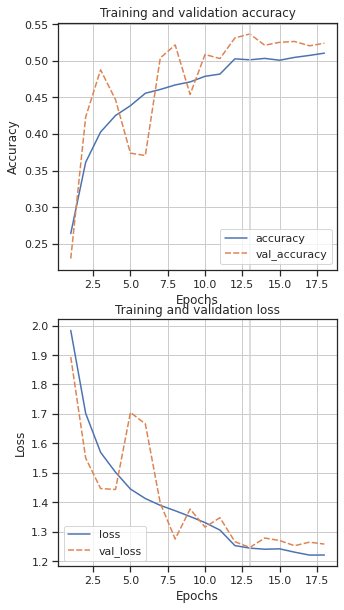

In [ ]:
history = run_model(model, 'experiment_3', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                  

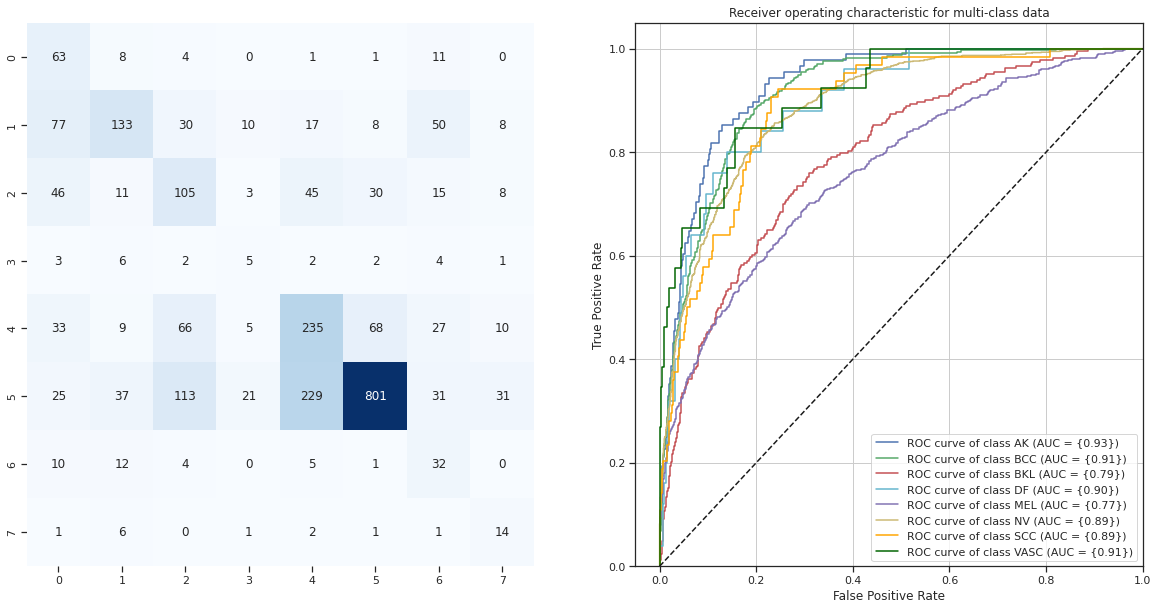

In [ ]:
model3 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5')
model3.summary()
evaluate_model(model3)

In [ ]:
model = compile_model(model3, optimizer='rmsprop')

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 1.9435 - accuracy: 0.3007
Epoch 1: val_loss improved from inf to 1.75032, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3_rmsprop.h5
453/453 [==============================] - 65s 139ms/step - loss: 1.9435 - accuracy: 0.3007 - val_loss: 1.7503 - val_accuracy: 0.2851 - lr: 1.0000e-04
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
453/453 [==============================] - ETA: 0s - loss: 1.7117 - accuracy: 0.3656
Epoch 2: val_loss did not improve from 1.75032
453/453 [==============================] - 63s 139ms/step - loss: 1.7117 - accuracy: 0.3656 - val_loss: 2.5327 - val_accuracy: 0.1056 - lr: 1.0000e-04
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
453/453 [==============================] - ETA: 0s - loss: 1.6206 - accuracy: 0.4021
Epoch 3: val_loss improved from 1.75032 to 1.71700, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3_rmsprop.h5
453/453 [==============================] - 63s 138ms/step - loss: 1.6206 - accuracy: 0.4021 - val_loss: 1.7170 - val_accuracy: 0.3412 - lr: 1.0000e-04
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5523 - accuracy: 0.4279
Epoch 4: val_loss did not improve from 1.71700
453/453 [==============================] - 62s 136ms/step - loss: 1.5535 - accuracy: 0.4279 - val_loss: 1.9392 - val_accuracy: 0.2618 - lr: 1.0000e-04
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
453/453 [==============================] - ETA: 0s - loss: 1.5241 - accuracy: 0.4400
Epoch 5: val_loss did not improve from 1.71700
453/453 [==============================] - 62s 136ms/step - loss: 1.5241 - accuracy: 0.4400 - val_loss: 1.9088 - val_accuracy: 0.3175 - lr: 1.0000e-04
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
453/453 [==============================] - ETA: 0s - loss: 1.4952 - accuracy: 0.4401
Epoch 6: val_loss improved from 1.71700 to 1.28052, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3_rmsprop.h5
453/453 [==============================] - 64s 140ms/step - loss: 1.4952 - accuracy: 0.4401 - val_loss: 1.2805 - val_accuracy: 0.5461 - lr: 1.0000e-04
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4647 - accuracy: 0.4528
Epoch 7: val_loss did not improve from 1.28052
453/453 [==============================] - 62s 136ms/step - loss: 1.4644 - accuracy: 0.4529 - val_loss: 1.3351 - val_accuracy: 0.4741 - lr: 1.0000e-04
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
453/453 [==============================] - ETA: 0s - loss: 1.4573 - accuracy: 0.4602
Epoch 8: val_loss did not improve from 1.28052
453/453 [==============================] - 62s 136ms/step - loss: 1.4573 - accuracy: 0.4602 - val_loss: 1.3336 - val_accuracy: 0.5484 - lr: 1.0000e-04
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.4513 - accuracy: 0.4604
Epoch 9: val_loss did not improve from 1.28052
453/453 [==============================] - 63s 137ms/step - loss: 1.4517 - accuracy: 0.4602 - val_loss: 1.5035 - val_accuracy: 0.4701 - lr: 1.0000e-04
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
453/453 [==============================] - ETA: 0s - loss: 1.3746 - accuracy: 0.4826
Epoch 10: val_loss did not improve from 1.28052
453/453 [==============================] - 62s 136ms/step - loss: 1.3746 - accuracy: 0.4826 - val_loss: 1.3486 - val_accuracy: 0.5049 - lr: 1.0000e-05
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3654 - accuracy: 0.4847
Epoch 11: val_loss did not improve from 1.28052
453/453 [==============================] - 62s 135ms/step - loss: 1.3647 - accuracy: 0.4850 - val_loss: 1.3152 - val_accuracy: 0.5306 - lr: 1.0000e-05
Epoch 11: early stopping


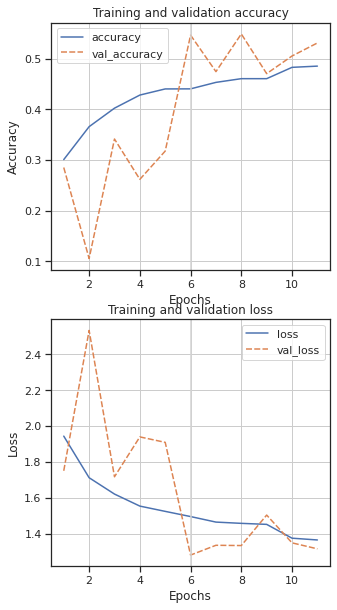

In [ ]:
history = run_model(model, 'experiment_3_rmsprop', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                  

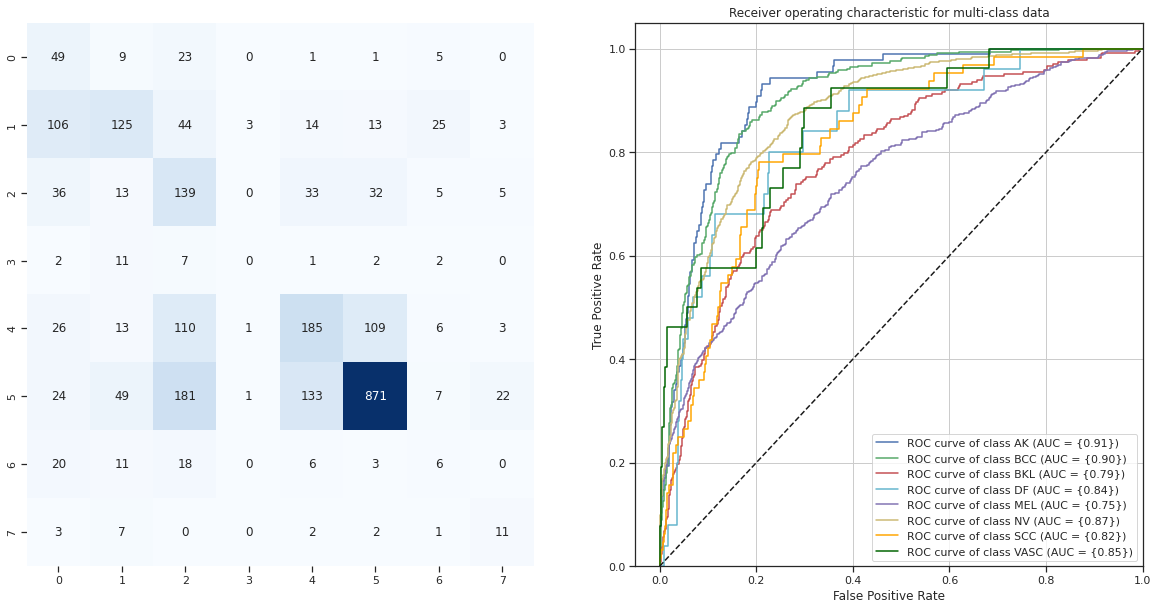

In [ ]:
model3_sgd = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3_rmsprop.h5')
model3_sgd.summary()
evaluate_model(model3_sgd)

###Fourth model

In [ ]:
model4 = models.Sequential()
model4.add(layers.InputLayer(input_shape=(300, 300, 3)))
model4.add(data_augmentation)
model4.add(layers.Rescaling(1./255))

model4.add(layers.Conv2D(32, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Conv2D(256, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1024, activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(8, activation='softmax'))

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model4)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 1.9377 - accuracy: 0.2703
Epoch 1: val_loss improved from inf to 1.86600, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 82s 147ms/step - loss: 1.9377 - accuracy: 0.2703 - val_loss: 1.8660 - val_accuracy: 0.2962
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.5775 - accuracy: 0.3758
Epoch 2: val_loss did not improve from 1.86600
453/453 [==============================] - 61s 134ms/step - loss: 1.5779 - accuracy: 0.3758 - val_loss: 2.0359 - val_accuracy: 0.2531
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.4946 - accuracy: 0.4128
Epoch 3: val_loss improved from 1.86600 to 1.76695, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 61s 134ms/step - loss: 1.4943 - accuracy: 0.4128 - val_loss: 1.7669 - val_accuracy: 0.3662
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.4563 - accuracy: 0.4308
Epoch 4: val_loss improved from 1.76695 to 1.64072, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.4566 - accuracy: 0.4307 - val_loss: 1.6407 - val_accuracy: 0.4057
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.4322 - accuracy: 0.4484
Epoch 5: val_loss improved from 1.64072 to 1.50147, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 62s 134ms/step - loss: 1.4319 - accuracy: 0.4484 - val_loss: 1.5015 - val_accuracy: 0.4464
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.3970 - accuracy: 0.4503
Epoch 6: val_loss did not improve from 1.50147
453/453 [==============================] - 60s 131ms/step - loss: 1.3967 - accuracy: 0.4504 - val_loss: 1.8315 - val_accuracy: 0.3784
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.4604
Epoch 7: val_loss did not improve from 1.50147
453/453 [==============================] - 60s 132ms/step - loss: 1.3820 - accuracy: 0.4604 - val_loss: 1.7134 - val_accuracy: 0.3847
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.3561 - accuracy: 0.4679
Epoch 8: val_loss did not improve from 1.50147
453/453 [==============================] - 60s 131ms/step - loss: 1.3565 - accuracy: 0.4678 - val_loss: 1.6064 - val_accuracy: 0.3982
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.3405 - accuracy: 0.4727
Epoch 9: val_loss did not improve from 1.50147
453/453 [==============================] - 60s 131ms/step - loss: 1.3410 - accuracy: 0.4727 - val_loss: 1.5510 - val_accuracy: 0.4381
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3342 - accuracy: 0.4728
Epoch 10: val_loss improved from 1.50147 to 1.33807, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 61s 134ms/step - loss: 1.3344 - accuracy: 0.4727 - val_loss: 1.3381 - val_accuracy: 0.5045
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3114 - accuracy: 0.4798
Epoch 11: val_loss improved from 1.33807 to 1.20293, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5
453/453 [==============================] - 62s 135ms/step - loss: 1.3114 - accuracy: 0.4799 - val_loss: 1.2029 - val_accuracy: 0.5544
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.2991 - accuracy: 0.4860
Epoch 12: val_loss did not improve from 1.20293
453/453 [==============================] - 60s 132ms/step - loss: 1.3005 - accuracy: 0.4859 - val_loss: 1.4310 - val_accuracy: 0.4883
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.2866 - accuracy: 0.4929
Epoch 13: val_loss did not improve from 1.20293
453/453 [==============================] - 60s 130ms/step - loss: 1.2862 - accuracy: 0.4928 - val_loss: 1.6515 - val_accuracy: 0.3950
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.2758 - accuracy: 0.4943
Epoch 14: val_loss did not improve from 1.20293
453/453 [==============================] - 60s 132ms/step - loss: 1.2757 - accuracy: 0.4943 - val_loss: 1.5658 - val_accuracy: 0.4456
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.2629 - accuracy: 0.4981
Epoch 15: val_loss did not improve from 1.20293
453/453 [==============================] - 60s 130ms/step - loss: 1.2626 - accuracy: 0.4982 - val_loss: 1.2253 - val_accuracy: 0.5437
Epoch 16/30


0/453           ETA: ?s - 

Epoch 16/30
452/453 [============================>.] - ETA: 0s - loss: 1.2535 - accuracy: 0.4950
Epoch 16: val_loss did not improve from 1.20293
453/453 [==============================] - 61s 132ms/step - loss: 1.2546 - accuracy: 0.4947 - val_loss: 1.6066 - val_accuracy: 0.3891
Epoch 16: early stopping


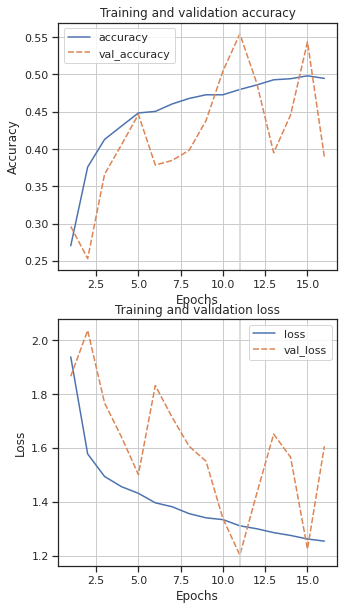

In [ ]:
history = run_model(model, 'experiment_4', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                  

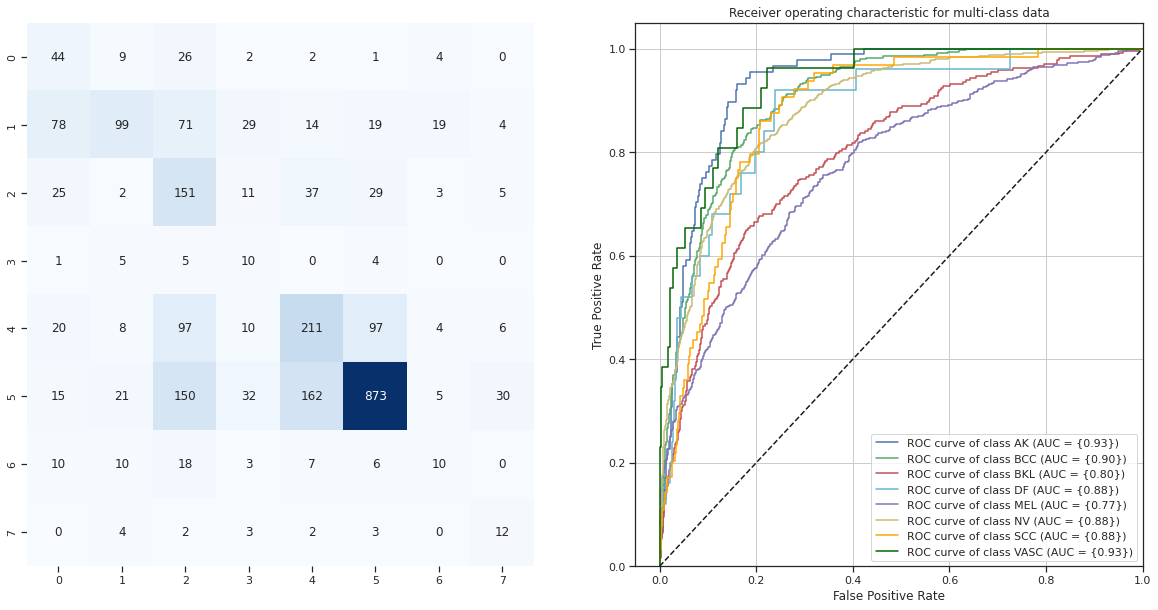

In [ ]:
model4 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5')
model4.summary()
evaluate_model(model4)

### Sixth Model

In [ ]:
model6 = models.Sequential()
model6.add(layers.InputLayer(input_shape=(300, 300, 3)))
model6.add(data_augmentation)
model6.add(layers.Rescaling(1./255))


model6.add(layers.Conv2D(32, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(128, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Conv2D(256, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Flatten())
model6.add(layers.Dense(256, activation='relu'))
model6.add(layers.Dense(256, activation='relu'))
model6.add(layers.Dense(8, activation='softmax'))

In [ ]:
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 299, 299, 32)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model6)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
452/453 [============================>.] - ETA: 0s - loss: 1.9442 - accuracy: 0.2515
Epoch 1: val_loss improved from inf to 1.76520, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 62s 132ms/step - loss: 1.9438 - accuracy: 0.2514 - val_loss: 1.7652 - val_accuracy: 0.3318
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.6303 - accuracy: 0.3682
Epoch 2: val_loss did not improve from 1.76520
453/453 [==============================] - 60s 131ms/step - loss: 1.6303 - accuracy: 0.3681 - val_loss: 1.8236 - val_accuracy: 0.3049
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.5486 - accuracy: 0.4031
Epoch 3: val_loss improved from 1.76520 to 1.53959, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.5482 - accuracy: 0.4032 - val_loss: 1.5396 - val_accuracy: 0.4013
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5099 - accuracy: 0.4168
Epoch 4: val_loss improved from 1.53959 to 1.51399, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.5095 - accuracy: 0.4170 - val_loss: 1.5140 - val_accuracy: 0.4089
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.4623 - accuracy: 0.4434
Epoch 5: val_loss improved from 1.51399 to 1.47139, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 61s 134ms/step - loss: 1.4623 - accuracy: 0.4435 - val_loss: 1.4714 - val_accuracy: 0.4318
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.4277 - accuracy: 0.4500
Epoch 6: val_loss did not improve from 1.47139
453/453 [==============================] - 59s 129ms/step - loss: 1.4283 - accuracy: 0.4501 - val_loss: 1.6117 - val_accuracy: 0.3701
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4109 - accuracy: 0.4495
Epoch 7: val_loss did not improve from 1.47139
453/453 [==============================] - 59s 129ms/step - loss: 1.4104 - accuracy: 0.4496 - val_loss: 1.5340 - val_accuracy: 0.3942
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.3889 - accuracy: 0.4561
Epoch 8: val_loss did not improve from 1.47139
453/453 [==============================] - 60s 130ms/step - loss: 1.3885 - accuracy: 0.4561 - val_loss: 1.4898 - val_accuracy: 0.3895
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.3650 - accuracy: 0.4578
Epoch 9: val_loss improved from 1.47139 to 1.44079, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 131ms/step - loss: 1.3645 - accuracy: 0.4580 - val_loss: 1.4408 - val_accuracy: 0.4057
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3484 - accuracy: 0.4704
Epoch 10: val_loss improved from 1.44079 to 1.42952, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 131ms/step - loss: 1.3484 - accuracy: 0.4705 - val_loss: 1.4295 - val_accuracy: 0.4267
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3232 - accuracy: 0.4738
Epoch 11: val_loss did not improve from 1.42952
453/453 [==============================] - 60s 130ms/step - loss: 1.3234 - accuracy: 0.4739 - val_loss: 1.5000 - val_accuracy: 0.3768
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.3124 - accuracy: 0.4771
Epoch 12: val_loss improved from 1.42952 to 1.42197, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 131ms/step - loss: 1.3126 - accuracy: 0.4769 - val_loss: 1.4220 - val_accuracy: 0.4156
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.2910 - accuracy: 0.4820
Epoch 13: val_loss improved from 1.42197 to 1.31640, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.2906 - accuracy: 0.4821 - val_loss: 1.3164 - val_accuracy: 0.4970
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.2864 - accuracy: 0.4858
Epoch 14: val_loss did not improve from 1.31640
453/453 [==============================] - 59s 130ms/step - loss: 1.2864 - accuracy: 0.4858 - val_loss: 1.3712 - val_accuracy: 0.4516
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.2671 - accuracy: 0.4932
Epoch 15: val_loss did not improve from 1.31640
453/453 [==============================] - 60s 130ms/step - loss: 1.2670 - accuracy: 0.4930 - val_loss: 1.4788 - val_accuracy: 0.4203
Epoch 16/30


0/453           ETA: ?s - 

Epoch 16/30
452/453 [============================>.] - ETA: 0s - loss: 1.2563 - accuracy: 0.5007
Epoch 16: val_loss did not improve from 1.31640
453/453 [==============================] - 59s 129ms/step - loss: 1.2560 - accuracy: 0.5007 - val_loss: 1.3605 - val_accuracy: 0.4583
Epoch 17/30


0/453           ETA: ?s - 

Epoch 17/30
452/453 [============================>.] - ETA: 0s - loss: 1.2362 - accuracy: 0.5016
Epoch 17: val_loss did not improve from 1.31640
453/453 [==============================] - 59s 129ms/step - loss: 1.2360 - accuracy: 0.5017 - val_loss: 1.4565 - val_accuracy: 0.4195
Epoch 18/30


0/453           ETA: ?s - 

Epoch 18/30
452/453 [============================>.] - ETA: 0s - loss: 1.2288 - accuracy: 0.5030
Epoch 18: val_loss did not improve from 1.31640
453/453 [==============================] - 59s 129ms/step - loss: 1.2283 - accuracy: 0.5034 - val_loss: 1.3523 - val_accuracy: 0.4800
Epoch 18: early stopping


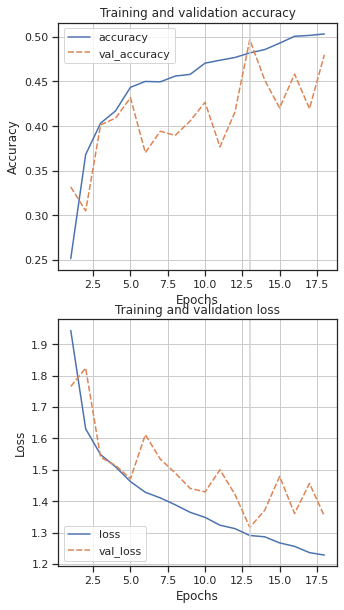

In [ ]:
history = run_model(model, 'experiment_6', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 299, 299, 32)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                  

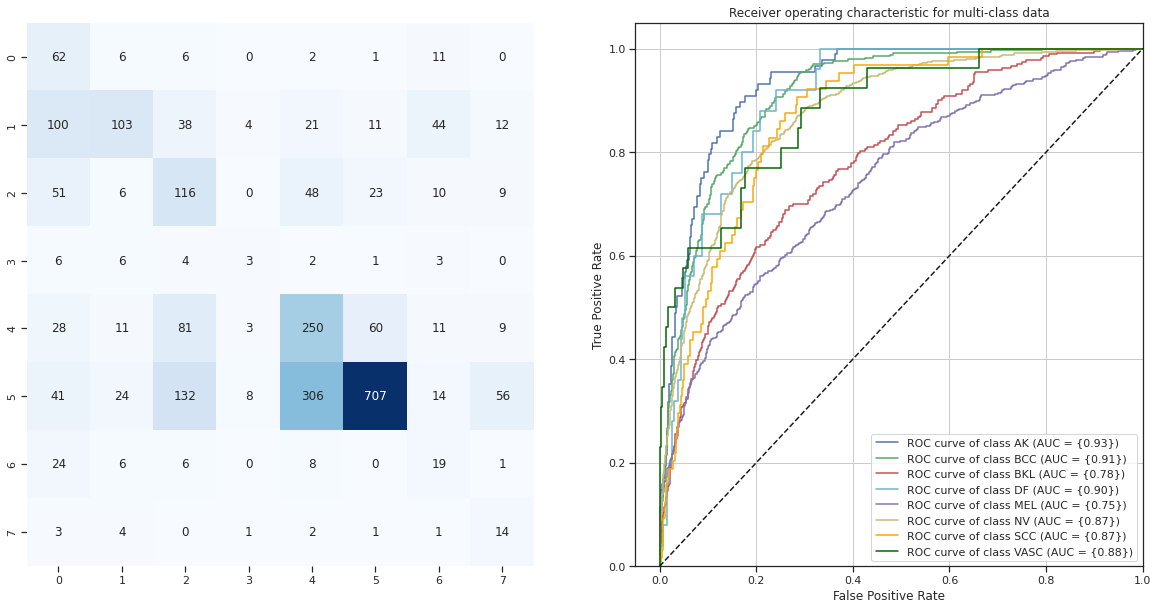

In [ ]:
model6 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_6.h5')
model6.summary()
evaluate_model(model6)

### Seventh Model

In [ ]:
model7 = models.Sequential()
model7.add(layers.InputLayer(input_shape=(300, 300, 3)))
model7.add(data_augmentation)
model7.add(layers.Rescaling(1./255))


model7.add(layers.Conv2D(32, (2, 2), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))

model7.add(layers.Conv2D(64, (2, 2), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))

model7.add(layers.Conv2D(128, (2, 2), activation='relu'))
model7.add(layers.MaxPooling2D((3, 3)))

model7.add(layers.Conv2D(256, (2, 2), activation='relu'))
model7.add(layers.MaxPooling2D((3, 3)))

model7.add(layers.Flatten())
model7.add(layers.Dense(128, activation='relu'))
model7.add(layers.Dense(256, activation='relu'))
#model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(8, activation='softmax'))

In [ ]:
model7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_99 (Conv2D)          (None, 299, 299, 32)      416       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                 

In [ ]:
model = compile_model(model7)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 1.9784 - accuracy: 0.2612
Epoch 1: val_loss improved from inf to 1.66619, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 62s 130ms/step - loss: 1.9784 - accuracy: 0.2612 - val_loss: 1.6662 - val_accuracy: 0.4144
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.6718 - accuracy: 0.3659
Epoch 2: val_loss improved from 1.66619 to 1.53924, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.6716 - accuracy: 0.3659 - val_loss: 1.5392 - val_accuracy: 0.4156
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.5624 - accuracy: 0.4032
Epoch 3: val_loss did not improve from 1.53924
453/453 [==============================] - 58s 127ms/step - loss: 1.5618 - accuracy: 0.4033 - val_loss: 1.5485 - val_accuracy: 0.4152
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5063 - accuracy: 0.4274
Epoch 4: val_loss did not improve from 1.53924
453/453 [==============================] - 59s 128ms/step - loss: 1.5067 - accuracy: 0.4274 - val_loss: 1.5649 - val_accuracy: 0.3915
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.4743 - accuracy: 0.4311
Epoch 5: val_loss did not improve from 1.53924
453/453 [==============================] - 59s 129ms/step - loss: 1.4740 - accuracy: 0.4311 - val_loss: 1.5720 - val_accuracy: 0.4065
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.4340 - accuracy: 0.4442
Epoch 6: val_loss improved from 1.53924 to 1.53014, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 59s 130ms/step - loss: 1.4337 - accuracy: 0.4443 - val_loss: 1.5301 - val_accuracy: 0.4100
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4064 - accuracy: 0.4546
Epoch 7: val_loss did not improve from 1.53014
453/453 [==============================] - 58s 127ms/step - loss: 1.4063 - accuracy: 0.4545 - val_loss: 1.6818 - val_accuracy: 0.3503
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.3891 - accuracy: 0.4535
Epoch 8: val_loss improved from 1.53014 to 1.51477, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 59s 129ms/step - loss: 1.3889 - accuracy: 0.4534 - val_loss: 1.5148 - val_accuracy: 0.4191
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.3693 - accuracy: 0.4615
Epoch 9: val_loss improved from 1.51477 to 1.37697, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 59s 129ms/step - loss: 1.3691 - accuracy: 0.4616 - val_loss: 1.3770 - val_accuracy: 0.4630
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3639 - accuracy: 0.4589
Epoch 10: val_loss did not improve from 1.37697
453/453 [==============================] - 59s 129ms/step - loss: 1.3643 - accuracy: 0.4589 - val_loss: 1.3799 - val_accuracy: 0.4500
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3353 - accuracy: 0.4683
Epoch 11: val_loss did not improve from 1.37697
453/453 [==============================] - 58s 127ms/step - loss: 1.3356 - accuracy: 0.4683 - val_loss: 1.6602 - val_accuracy: 0.3721
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.3176 - accuracy: 0.4733
Epoch 12: val_loss did not improve from 1.37697
453/453 [==============================] - 59s 128ms/step - loss: 1.3174 - accuracy: 0.4733 - val_loss: 1.4483 - val_accuracy: 0.4381
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.3013 - accuracy: 0.4806
Epoch 13: val_loss did not improve from 1.37697
453/453 [==============================] - 58s 126ms/step - loss: 1.3016 - accuracy: 0.4806 - val_loss: 1.4186 - val_accuracy: 0.4784
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.2987 - accuracy: 0.4731
Epoch 14: val_loss improved from 1.37697 to 1.28781, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5
453/453 [==============================] - 58s 128ms/step - loss: 1.2984 - accuracy: 0.4732 - val_loss: 1.2878 - val_accuracy: 0.5010
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.2843 - accuracy: 0.4855
Epoch 15: val_loss did not improve from 1.28781
453/453 [==============================] - 58s 127ms/step - loss: 1.2839 - accuracy: 0.4857 - val_loss: 1.3645 - val_accuracy: 0.4678
Epoch 16/30


0/453           ETA: ?s - 

Epoch 16/30
452/453 [============================>.] - ETA: 0s - loss: 1.2698 - accuracy: 0.4896
Epoch 16: val_loss did not improve from 1.28781
453/453 [==============================] - 58s 126ms/step - loss: 1.2698 - accuracy: 0.4897 - val_loss: 1.3019 - val_accuracy: 0.5164
Epoch 17/30


0/453           ETA: ?s - 

Epoch 17/30
452/453 [============================>.] - ETA: 0s - loss: 1.2503 - accuracy: 0.4920
Epoch 17: val_loss did not improve from 1.28781
453/453 [==============================] - 59s 129ms/step - loss: 1.2508 - accuracy: 0.4920 - val_loss: 1.3141 - val_accuracy: 0.4931
Epoch 18/30


0/453           ETA: ?s - 

Epoch 18/30
452/453 [============================>.] - ETA: 0s - loss: 1.2445 - accuracy: 0.4947
Epoch 18: val_loss did not improve from 1.28781
453/453 [==============================] - 58s 126ms/step - loss: 1.2439 - accuracy: 0.4949 - val_loss: 1.3085 - val_accuracy: 0.5136
Epoch 19/30


0/453           ETA: ?s - 

Epoch 19/30
452/453 [============================>.] - ETA: 0s - loss: 1.2317 - accuracy: 0.5023
Epoch 19: val_loss did not improve from 1.28781
453/453 [==============================] - 59s 128ms/step - loss: 1.2313 - accuracy: 0.5022 - val_loss: 1.3300 - val_accuracy: 0.4836
Epoch 19: early stopping


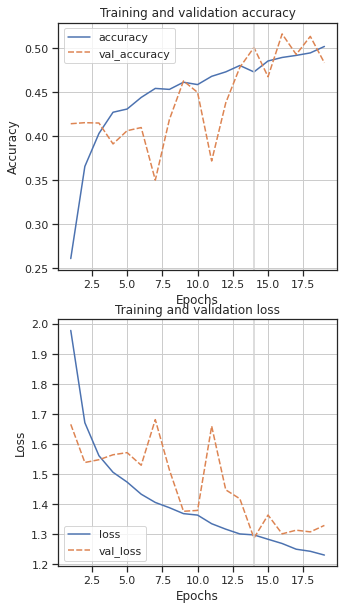

In [ ]:
history = run_model(model, 'experiment_7', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 7s 83ms/step - loss: 1.2745 - accuracy: 0.5028
Test loss: 1.274
Test accuracy: 0.503
Precision: 0.3402629778323032
Recall: 0.42359950082205633
F1-Score: 0.336348504290532
Accuracy on Test Data: 0.50%

              precision    recall  f1-score   support

           0       0.21      0.64      0.32        88
           1       0.59      0.30      0.40       333
           2       0.28      0.51      0.36       263
           3       0.06      0.04      0.05        25
           4       0.40      0.51      0.45       453
           5       0.88      0.56      0.68      1288
           6       0.16      0.25      0.20        64
           7       0.15      0.58      0.24        26

    accuracy                           0.50      2540
   macro avg       0.34      0.42      0.34      2540
weighted avg       0.64      0.50      0.54      2540



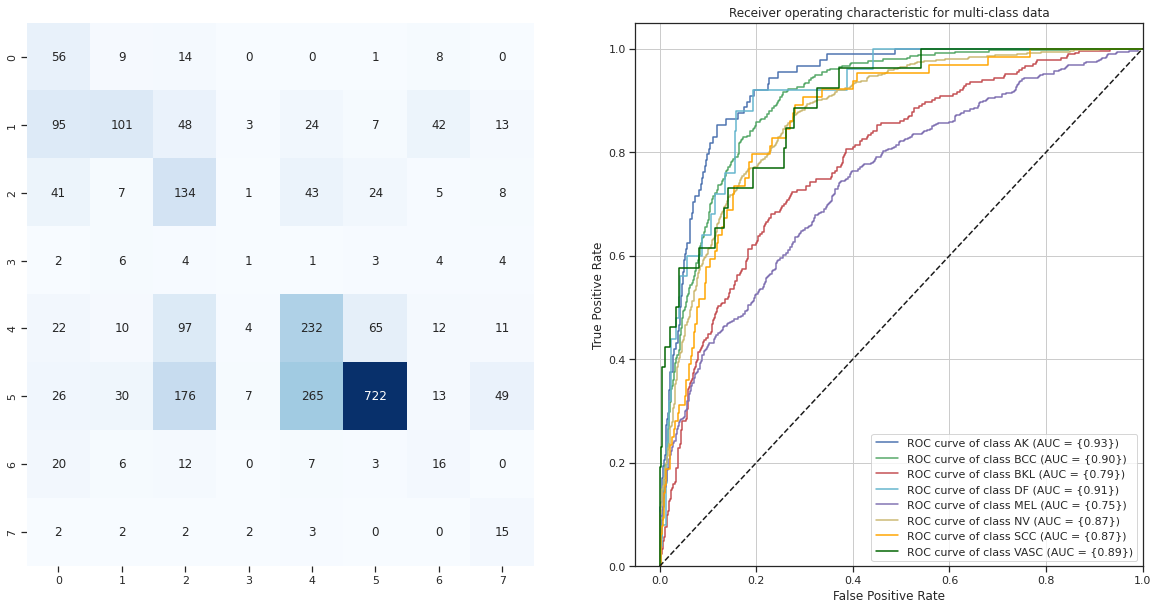

In [ ]:
model7 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_7.h5')
evaluate_model(model7)

### Tenth Model

In this second experiment we added the dropout with a rate of 0.5 before and after the dense layer.

In [ ]:
model10 = models.Sequential()
model10.add(layers.InputLayer(input_shape=(300, 300, 3)))
model10.add(data_augmentation)
model10.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))

model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))

model10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((3, 3)))

model10.add(layers.Conv2D(256, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((5, 5)))   

model10.add(layers.Flatten())
model10.add(layers.Dense(512, activation='relu'))
model10.add(layers.Dropout(0.25))
model10.add(layers.Dense(256, activation='relu'))
model10.add(layers.Dropout(0.25))
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dropout(0.25))
model10.add(layers.Dense(8, activation='softmax'))

In [ ]:
model10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                 

In [ ]:
model = compile_model(model10)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
452/453 [============================>.] - ETA: 0s - loss: 1.9537 - accuracy: 0.2745
Epoch 1: val_loss improved from inf to 1.63466, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 62s 134ms/step - loss: 1.9537 - accuracy: 0.2744 - val_loss: 1.6347 - val_accuracy: 0.4002
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.7658 - accuracy: 0.3226
Epoch 2: val_loss did not improve from 1.63466
453/453 [==============================] - 61s 133ms/step - loss: 1.7654 - accuracy: 0.3225 - val_loss: 1.7564 - val_accuracy: 0.3365
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.6637 - accuracy: 0.3595
Epoch 3: val_loss improved from 1.63466 to 1.57071, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 60s 131ms/step - loss: 1.6639 - accuracy: 0.3593 - val_loss: 1.5707 - val_accuracy: 0.4361
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5904 - accuracy: 0.3886
Epoch 4: val_loss did not improve from 1.57071
453/453 [==============================] - 60s 131ms/step - loss: 1.5903 - accuracy: 0.3884 - val_loss: 1.5835 - val_accuracy: 0.4108
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.5382 - accuracy: 0.4127
Epoch 5: val_loss improved from 1.57071 to 1.38897, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 60s 132ms/step - loss: 1.5379 - accuracy: 0.4128 - val_loss: 1.3890 - val_accuracy: 0.4974
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.4929 - accuracy: 0.4243
Epoch 6: val_loss improved from 1.38897 to 1.29417, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 61s 134ms/step - loss: 1.4927 - accuracy: 0.4242 - val_loss: 1.2942 - val_accuracy: 0.5271
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4614 - accuracy: 0.4390
Epoch 7: val_loss did not improve from 1.29417
453/453 [==============================] - 60s 131ms/step - loss: 1.4609 - accuracy: 0.4392 - val_loss: 1.4854 - val_accuracy: 0.4611
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.4240 - accuracy: 0.4419
Epoch 8: val_loss did not improve from 1.29417
453/453 [==============================] - 60s 132ms/step - loss: 1.4241 - accuracy: 0.4417 - val_loss: 1.4138 - val_accuracy: 0.4599
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.4089 - accuracy: 0.4500
Epoch 9: val_loss did not improve from 1.29417
453/453 [==============================] - 60s 132ms/step - loss: 1.4087 - accuracy: 0.4499 - val_loss: 1.3106 - val_accuracy: 0.4962
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.3841 - accuracy: 0.4575
Epoch 10: val_loss improved from 1.29417 to 1.28354, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 62s 134ms/step - loss: 1.3839 - accuracy: 0.4575 - val_loss: 1.2835 - val_accuracy: 0.5069
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.3557 - accuracy: 0.4625
Epoch 11: val_loss improved from 1.28354 to 1.23969, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5
453/453 [==============================] - 62s 136ms/step - loss: 1.3558 - accuracy: 0.4626 - val_loss: 1.2397 - val_accuracy: 0.5354
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.3626 - accuracy: 0.4567
Epoch 12: val_loss did not improve from 1.23969
453/453 [==============================] - 61s 133ms/step - loss: 1.3625 - accuracy: 0.4569 - val_loss: 1.2859 - val_accuracy: 0.5295
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.3355 - accuracy: 0.4669
Epoch 13: val_loss did not improve from 1.23969
453/453 [==============================] - 61s 132ms/step - loss: 1.3353 - accuracy: 0.4667 - val_loss: 1.3745 - val_accuracy: 0.4622
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.3194 - accuracy: 0.4763
Epoch 14: val_loss did not improve from 1.23969
453/453 [==============================] - 60s 131ms/step - loss: 1.3189 - accuracy: 0.4765 - val_loss: 1.4063 - val_accuracy: 0.4705
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.3073 - accuracy: 0.4746
Epoch 15: val_loss did not improve from 1.23969
453/453 [==============================] - 60s 132ms/step - loss: 1.3069 - accuracy: 0.4747 - val_loss: 1.4040 - val_accuracy: 0.4765
Epoch 16/30


0/453           ETA: ?s - 

Epoch 16/30
452/453 [============================>.] - ETA: 0s - loss: 1.2944 - accuracy: 0.4741
Epoch 16: val_loss did not improve from 1.23969
453/453 [==============================] - 62s 135ms/step - loss: 1.2959 - accuracy: 0.4739 - val_loss: 1.2905 - val_accuracy: 0.4998
Epoch 16: early stopping


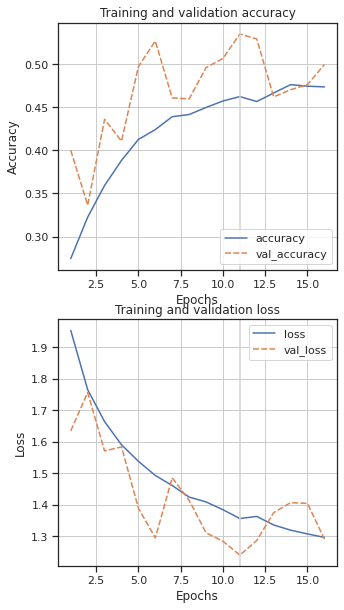

In [ ]:
history = run_model(model, 'experiment_10', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 7s 84ms/step - loss: 1.2152 - accuracy: 0.5461
Test loss: 1.215
Test accuracy: 0.546
Precision: 0.347330035991221
Recall: 0.41228675211212146
F1-Score: 0.34066346863110575
Accuracy on Test Data: 0.55%

              precision    recall  f1-score   support

           0       0.23      0.51      0.31        88
           1       0.62      0.28      0.39       333
           2       0.33      0.40      0.36       263
           3       0.08      0.08      0.08        25
           4       0.41      0.50      0.45       453
           5       0.84      0.69      0.76      1288
           6       0.16      0.27      0.20        64
           7       0.10      0.58      0.18        26

    accuracy                           0.55      2540
   macro avg       0.35      0.41      0.34      2540
weighted avg       0.63      0.55      0.57      2540



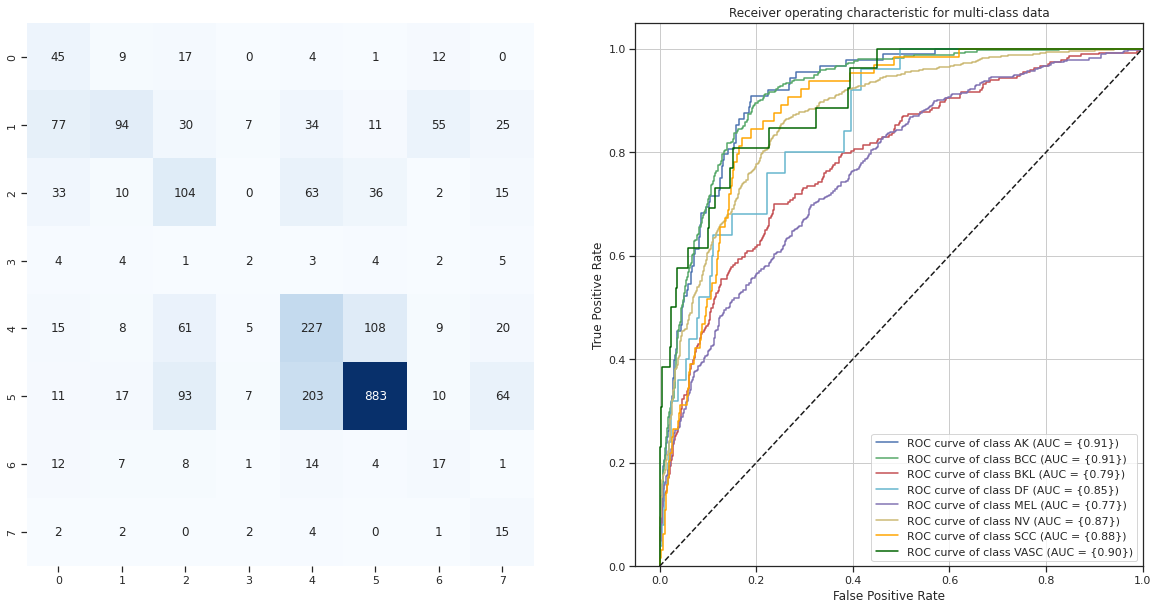

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_10.h5')
#model2.summary()
evaluate_model(model2)

### Eight Model (from paper)

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

In [ ]:
model8 = models.Sequential()
model8.add(layers.InputLayer(input_shape=(300, 300, 3)))
model8.add(data_augmentation)
model8.add(layers.Rescaling(1./255))

model8.add(layers.Conv2D(16, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(32, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Dropout(0.5))
model8.add(layers.Flatten())
model8.add(layers.Dense(8, activation='softmax'))


In [ ]:
model8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                  

In [ ]:
model = compile_model(model8)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/453           ETA: ?s - 

Epoch 1/30
453/453 [==============================] - ETA: 0s - loss: 1.9323 - accuracy: 0.2696
Epoch 1: val_loss improved from inf to 1.61496, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 54s 114ms/step - loss: 1.9323 - accuracy: 0.2696 - val_loss: 1.6150 - val_accuracy: 0.3630
Epoch 2/30


0/453           ETA: ?s - 

Epoch 2/30
452/453 [============================>.] - ETA: 0s - loss: 1.7017 - accuracy: 0.3682
Epoch 2: val_loss improved from 1.61496 to 1.53287, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 52s 113ms/step - loss: 1.7015 - accuracy: 0.3682 - val_loss: 1.5329 - val_accuracy: 0.4385
Epoch 3/30


0/453           ETA: ?s - 

Epoch 3/30
452/453 [============================>.] - ETA: 0s - loss: 1.6086 - accuracy: 0.3944
Epoch 3: val_loss did not improve from 1.53287
453/453 [==============================] - 54s 118ms/step - loss: 1.6082 - accuracy: 0.3944 - val_loss: 1.7304 - val_accuracy: 0.3448
Epoch 4/30


0/453           ETA: ?s - 

Epoch 4/30
452/453 [============================>.] - ETA: 0s - loss: 1.5552 - accuracy: 0.4105
Epoch 4: val_loss did not improve from 1.53287
453/453 [==============================] - 52s 114ms/step - loss: 1.5546 - accuracy: 0.4106 - val_loss: 1.6915 - val_accuracy: 0.3788
Epoch 5/30


0/453           ETA: ?s - 

Epoch 5/30
452/453 [============================>.] - ETA: 0s - loss: 1.5296 - accuracy: 0.4216
Epoch 5: val_loss did not improve from 1.53287
453/453 [==============================] - 51s 112ms/step - loss: 1.5293 - accuracy: 0.4216 - val_loss: 1.6166 - val_accuracy: 0.4017
Epoch 6/30


0/453           ETA: ?s - 

Epoch 6/30
452/453 [============================>.] - ETA: 0s - loss: 1.4997 - accuracy: 0.4329
Epoch 6: val_loss improved from 1.53287 to 1.51801, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 53s 116ms/step - loss: 1.4996 - accuracy: 0.4330 - val_loss: 1.5180 - val_accuracy: 0.4527
Epoch 7/30


0/453           ETA: ?s - 

Epoch 7/30
452/453 [============================>.] - ETA: 0s - loss: 1.4791 - accuracy: 0.4390
Epoch 7: val_loss improved from 1.51801 to 1.47291, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 52s 114ms/step - loss: 1.4789 - accuracy: 0.4390 - val_loss: 1.4729 - val_accuracy: 0.4413
Epoch 8/30


0/453           ETA: ?s - 

Epoch 8/30
452/453 [============================>.] - ETA: 0s - loss: 1.4629 - accuracy: 0.4475
Epoch 8: val_loss did not improve from 1.47291
453/453 [==============================] - 52s 113ms/step - loss: 1.4628 - accuracy: 0.4475 - val_loss: 1.5567 - val_accuracy: 0.4239
Epoch 9/30


0/453           ETA: ?s - 

Epoch 9/30
452/453 [============================>.] - ETA: 0s - loss: 1.4487 - accuracy: 0.4474
Epoch 9: val_loss did not improve from 1.47291
453/453 [==============================] - 53s 117ms/step - loss: 1.4487 - accuracy: 0.4475 - val_loss: 1.5133 - val_accuracy: 0.4306
Epoch 10/30


0/453           ETA: ?s - 

Epoch 10/30
452/453 [============================>.] - ETA: 0s - loss: 1.4434 - accuracy: 0.4502
Epoch 10: val_loss did not improve from 1.47291
453/453 [==============================] - 51s 112ms/step - loss: 1.4433 - accuracy: 0.4502 - val_loss: 1.5426 - val_accuracy: 0.4219
Epoch 11/30


0/453           ETA: ?s - 

Epoch 11/30
452/453 [============================>.] - ETA: 0s - loss: 1.4272 - accuracy: 0.4570
Epoch 11: val_loss improved from 1.47291 to 1.43888, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 54s 117ms/step - loss: 1.4267 - accuracy: 0.4572 - val_loss: 1.4389 - val_accuracy: 0.4682
Epoch 12/30


0/453           ETA: ?s - 

Epoch 12/30
452/453 [============================>.] - ETA: 0s - loss: 1.4180 - accuracy: 0.4556
Epoch 12: val_loss did not improve from 1.43888
453/453 [==============================] - 54s 117ms/step - loss: 1.4175 - accuracy: 0.4558 - val_loss: 1.5694 - val_accuracy: 0.4263
Epoch 13/30


0/453           ETA: ?s - 

Epoch 13/30
452/453 [============================>.] - ETA: 0s - loss: 1.4241 - accuracy: 0.4557
Epoch 13: val_loss did not improve from 1.43888
453/453 [==============================] - 51s 111ms/step - loss: 1.4253 - accuracy: 0.4557 - val_loss: 1.5227 - val_accuracy: 0.4512
Epoch 14/30


0/453           ETA: ?s - 

Epoch 14/30
452/453 [============================>.] - ETA: 0s - loss: 1.4011 - accuracy: 0.4600
Epoch 14: val_loss improved from 1.43888 to 1.40586, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 52s 113ms/step - loss: 1.4010 - accuracy: 0.4600 - val_loss: 1.4059 - val_accuracy: 0.4757
Epoch 15/30


0/453           ETA: ?s - 

Epoch 15/30
452/453 [============================>.] - ETA: 0s - loss: 1.3999 - accuracy: 0.4587
Epoch 15: val_loss improved from 1.40586 to 1.36007, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 53s 117ms/step - loss: 1.3997 - accuracy: 0.4587 - val_loss: 1.3601 - val_accuracy: 0.4903
Epoch 16/30


0/453           ETA: ?s - 

Epoch 16/30
452/453 [============================>.] - ETA: 0s - loss: 1.3881 - accuracy: 0.4632
Epoch 16: val_loss did not improve from 1.36007
453/453 [==============================] - 52s 113ms/step - loss: 1.3880 - accuracy: 0.4631 - val_loss: 1.4364 - val_accuracy: 0.4674
Epoch 17/30


0/453           ETA: ?s - 

Epoch 17/30
452/453 [============================>.] - ETA: 0s - loss: 1.3896 - accuracy: 0.4624
Epoch 17: val_loss did not improve from 1.36007
453/453 [==============================] - 52s 113ms/step - loss: 1.3892 - accuracy: 0.4625 - val_loss: 1.4523 - val_accuracy: 0.4448
Epoch 18/30


0/453           ETA: ?s - 

Epoch 18/30
452/453 [============================>.] - ETA: 0s - loss: 1.3793 - accuracy: 0.4656
Epoch 18: val_loss improved from 1.36007 to 1.32475, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 55s 120ms/step - loss: 1.3794 - accuracy: 0.4658 - val_loss: 1.3247 - val_accuracy: 0.5208
Epoch 19/30


0/453           ETA: ?s - 

Epoch 19/30
452/453 [============================>.] - ETA: 0s - loss: 1.3717 - accuracy: 0.4687
Epoch 19: val_loss did not improve from 1.32475
453/453 [==============================] - 52s 114ms/step - loss: 1.3718 - accuracy: 0.4687 - val_loss: 1.3847 - val_accuracy: 0.4705
Epoch 20/30


0/453           ETA: ?s - 

Epoch 20/30
452/453 [============================>.] - ETA: 0s - loss: 1.3696 - accuracy: 0.4672
Epoch 20: val_loss did not improve from 1.32475
453/453 [==============================] - 51s 112ms/step - loss: 1.3694 - accuracy: 0.4672 - val_loss: 1.3509 - val_accuracy: 0.4875
Epoch 21/30


0/453           ETA: ?s - 

Epoch 21/30
452/453 [============================>.] - ETA: 0s - loss: 1.3667 - accuracy: 0.4671
Epoch 21: val_loss did not improve from 1.32475
453/453 [==============================] - 53s 115ms/step - loss: 1.3663 - accuracy: 0.4672 - val_loss: 1.3946 - val_accuracy: 0.4943
Epoch 22/30


0/453           ETA: ?s - 

Epoch 22/30
452/453 [============================>.] - ETA: 0s - loss: 1.3621 - accuracy: 0.4737
Epoch 22: val_loss improved from 1.32475 to 1.29835, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5
453/453 [==============================] - 52s 112ms/step - loss: 1.3617 - accuracy: 0.4737 - val_loss: 1.2984 - val_accuracy: 0.5101
Epoch 23/30


0/453           ETA: ?s - 

Epoch 23/30
452/453 [============================>.] - ETA: 0s - loss: 1.3567 - accuracy: 0.4724
Epoch 23: val_loss did not improve from 1.29835
453/453 [==============================] - 51s 112ms/step - loss: 1.3568 - accuracy: 0.4724 - val_loss: 1.3851 - val_accuracy: 0.4717
Epoch 24/30


0/453           ETA: ?s - 

Epoch 24/30
452/453 [============================>.] - ETA: 0s - loss: 1.3460 - accuracy: 0.4732
Epoch 24: val_loss did not improve from 1.29835
453/453 [==============================] - 53s 116ms/step - loss: 1.3454 - accuracy: 0.4734 - val_loss: 1.3848 - val_accuracy: 0.4986
Epoch 25/30


0/453           ETA: ?s - 

Epoch 25/30
452/453 [============================>.] - ETA: 0s - loss: 1.3387 - accuracy: 0.4768
Epoch 25: val_loss did not improve from 1.29835
453/453 [==============================] - 51s 112ms/step - loss: 1.3387 - accuracy: 0.4768 - val_loss: 1.3210 - val_accuracy: 0.5057
Epoch 26/30


0/453           ETA: ?s - 

Epoch 26/30
452/453 [============================>.] - ETA: 0s - loss: 1.3377 - accuracy: 0.4806
Epoch 26: val_loss did not improve from 1.29835
453/453 [==============================] - 52s 114ms/step - loss: 1.3378 - accuracy: 0.4806 - val_loss: 1.4464 - val_accuracy: 0.4678
Epoch 27/30


0/453           ETA: ?s - 

Epoch 27/30
452/453 [============================>.] - ETA: 0s - loss: 1.3330 - accuracy: 0.4768
Epoch 27: val_loss did not improve from 1.29835
453/453 [==============================] - 53s 116ms/step - loss: 1.3325 - accuracy: 0.4770 - val_loss: 1.3459 - val_accuracy: 0.5089
Epoch 27: early stopping


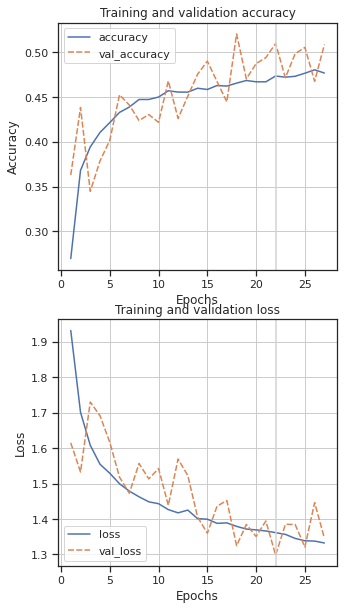

In [ ]:
history = run_model(model, 'experiment_8', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 7s 81ms/step - loss: 1.2911 - accuracy: 0.5114
Test loss: 1.291
Test accuracy: 0.511
Precision: 0.3506599107639539
Recall: 0.4114968849526814
F1-Score: 0.33291519137316355
Accuracy on Test Data: 0.51%

              precision    recall  f1-score   support

           0       0.20      0.81      0.32        88
           1       0.60      0.25      0.35       333
           2       0.25      0.57      0.35       263
           3       0.06      0.08      0.07        25
           4       0.49      0.38      0.43       453
           5       0.85      0.62      0.72      1288
           6       0.17      0.20      0.19        64
           7       0.18      0.38      0.24        26

    accuracy                           0.51      2540
   macro avg       0.35      0.41      0.33      2540
weighted avg       0.64      0.51      0.54      2540



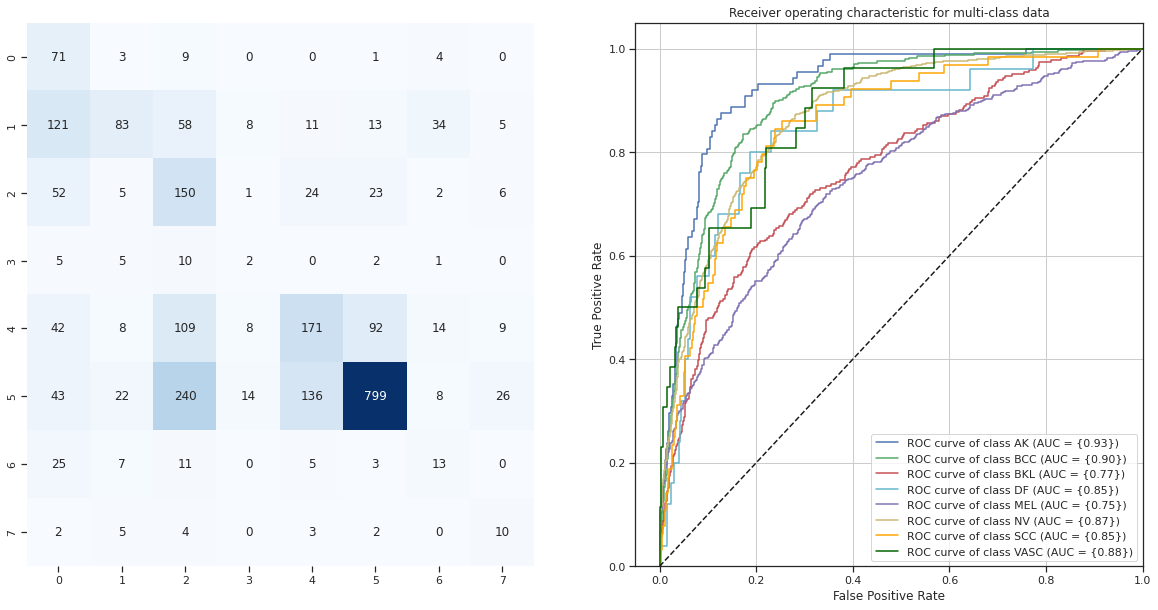

In [ ]:
model8 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_8.h5')
evaluate_model(model8)

### Inception network

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
inputs = data_augmentation(inputs)
inputs = layers.Rescaling(1./255)(inputs)

In [ ]:
x = layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation="relu") (inputs)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3,3))(x)
x = layers.Conv2D(filters=256, padding='same', kernel_size=(3,3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(5,5))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)


In [ ]:
y = layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation="relu")(inputs)
y = layers.MaxPooling2D(pool_size=(2,2))(y)
y = layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation="relu")(y)
y = layers.MaxPooling2D(pool_size=(2,2))(y)
y = layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation="relu")(y)
y = layers.MaxPooling2D(pool_size=(3,3))(y)
y = layers.Conv2D(filters=256, padding='same', kernel_size=(3,3), activation="relu")(y)
y = layers.MaxPooling2D(pool_size=(5,5))(y)
y = layers.Conv2D(filters=512, padding='same', kernel_size=(3,3), activation="relu")(y)
y = layers.Flatten()(y)
y = layers.Dropout(0.5)(y)
y = layers.Dense(256, activation='relu') (y)
y = layers.Dense(128, activation='relu') (y)
y = layers.Dropout(0.5)(y)


In [ ]:
z = layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation="relu")(inputs)
z = layers.MaxPooling2D(pool_size=(2,2))(z)
z = layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation="relu")(z)
z = layers.MaxPooling2D(pool_size=(2,2))(z)
z = layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation="relu")(z)
z = layers.MaxPooling2D(pool_size=(3,3))(z)
z = layers.Flatten()(z)
z = layers.Dense(128, activation='relu') (z)
z = layers.Dense(256, activation='relu') (z)


In [ ]:
q = layers.Conv2D(filters=32, padding='same', kernel_size=(3,3), activation="relu")(inputs)
q = layers.BatchNormalization()(q)
q = layers.MaxPooling2D(pool_size=(2,2))(q)
q = layers.Conv2D(filters=64, padding='same', kernel_size=(3,3), activation="relu")(q)
q = layers.BatchNormalization()(q)
q = layers.MaxPooling2D(pool_size=(2,2))(q)
q = layers.Conv2D(filters=128, padding='same', kernel_size=(3,3), activation="relu")(q)
q = layers.BatchNormalization()(q)
q = layers.MaxPooling2D(pool_size=(3,3))(q)
q = layers.Conv2D(filters=256, padding='same', kernel_size=(3,3), activation="relu")(q)
q = layers.BatchNormalization()(q)
q = layers.MaxPooling2D(pool_size=(5,5))(q)
q = layers.Flatten()(q)
q = layers.Dense(512, activation='relu') (q)
q = layers.Dropout(0.5)(q)


In [ ]:
w = concatenate([x, y]) 
outputs = layers.Dense(8, activation='softmax')(w)

model = keras.Model(inputs=inputs, outputs=outputs)

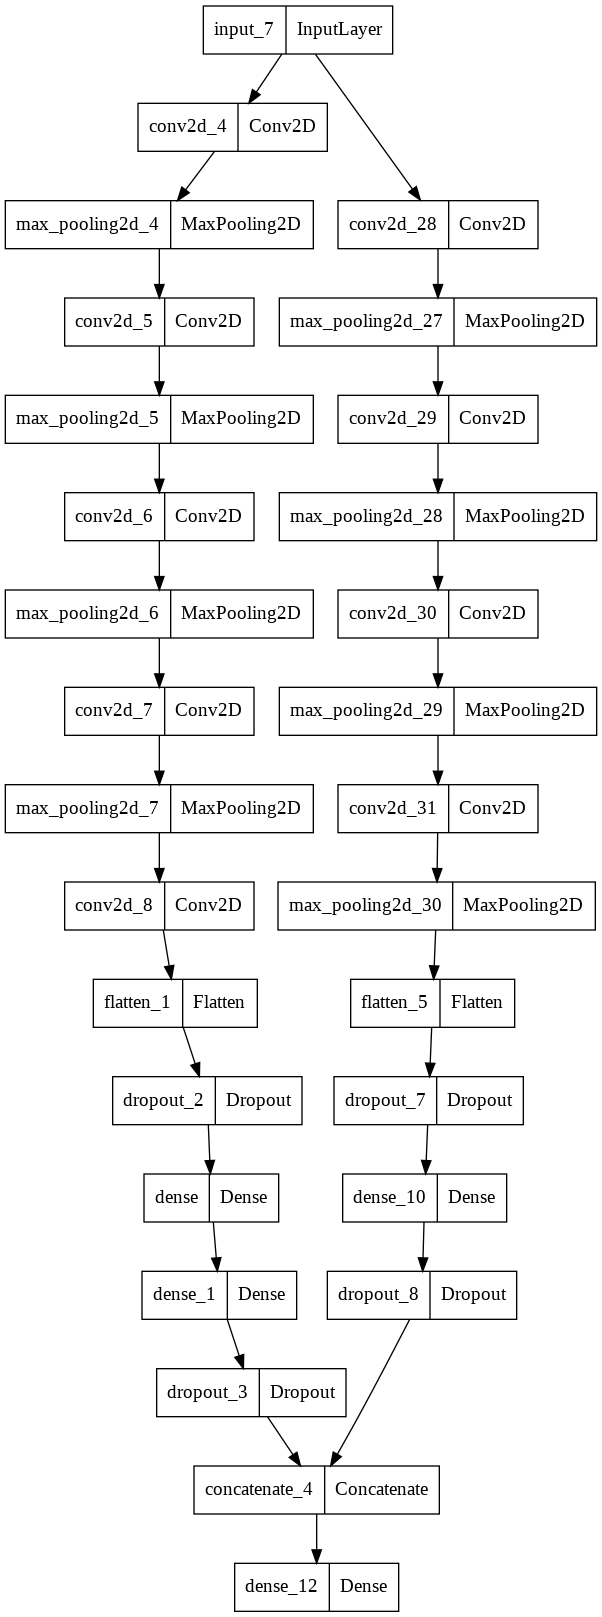

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 300, 300, 32  896         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 150, 150, 32  0          ['conv2d_4[5][0]']               
                                )                                                           

In [ ]:
model = compile_model(model)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/453           ETA: ?s - 

Epoch 1/50
453/453 [==============================] - ETA: 0s - loss: 1.8896 - accuracy: 0.2964
Epoch 1: val_loss improved from inf to 1.65623, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 101s 220ms/step - loss: 1.8896 - accuracy: 0.2964 - val_loss: 1.6562 - val_accuracy: 0.4274 - lr: 1.0000e-04
Epoch 2/50


0/453           ETA: ?s - 

Epoch 2/50
453/453 [==============================] - ETA: 0s - loss: 1.6465 - accuracy: 0.3771
Epoch 2: val_loss did not improve from 1.65623
453/453 [==============================] - 100s 219ms/step - loss: 1.6465 - accuracy: 0.3771 - val_loss: 1.7080 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 3/50


0/453           ETA: ?s - 

Epoch 3/50
453/453 [==============================] - ETA: 0s - loss: 1.5460 - accuracy: 0.4104
Epoch 3: val_loss improved from 1.65623 to 1.52691, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 101s 221ms/step - loss: 1.5460 - accuracy: 0.4104 - val_loss: 1.5269 - val_accuracy: 0.4555 - lr: 1.0000e-04
Epoch 4/50


0/453           ETA: ?s - 

Epoch 4/50
453/453 [==============================] - ETA: 0s - loss: 1.4540 - accuracy: 0.4321
Epoch 4: val_loss improved from 1.52691 to 1.15233, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 1.4540 - accuracy: 0.4321 - val_loss: 1.1523 - val_accuracy: 0.6010 - lr: 1.0000e-04
Epoch 5/50


0/453           ETA: ?s - 

Epoch 5/50
453/453 [==============================] - ETA: 0s - loss: 1.3786 - accuracy: 0.4649
Epoch 5: val_loss did not improve from 1.15233
453/453 [==============================] - 99s 218ms/step - loss: 1.3786 - accuracy: 0.4649 - val_loss: 1.3353 - val_accuracy: 0.5057 - lr: 1.0000e-04
Epoch 6/50


0/453           ETA: ?s - 

Epoch 6/50
453/453 [==============================] - ETA: 0s - loss: 1.3258 - accuracy: 0.4797
Epoch 6: val_loss improved from 1.15233 to 1.12281, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 101s 221ms/step - loss: 1.3258 - accuracy: 0.4797 - val_loss: 1.1228 - val_accuracy: 0.5856 - lr: 1.0000e-04
Epoch 7/50


0/453           ETA: ?s - 

Epoch 7/50
453/453 [==============================] - ETA: 0s - loss: 1.2706 - accuracy: 0.4937
Epoch 7: val_loss did not improve from 1.12281
453/453 [==============================] - 101s 221ms/step - loss: 1.2706 - accuracy: 0.4937 - val_loss: 1.2776 - val_accuracy: 0.5563 - lr: 1.0000e-04
Epoch 8/50


0/453           ETA: ?s - 

Epoch 8/50
453/453 [==============================] - ETA: 0s - loss: 1.2088 - accuracy: 0.5072
Epoch 8: val_loss did not improve from 1.12281
453/453 [==============================] - 99s 217ms/step - loss: 1.2088 - accuracy: 0.5072 - val_loss: 1.1398 - val_accuracy: 0.5801 - lr: 1.0000e-04
Epoch 9/50


0/453           ETA: ?s - 

Epoch 9/50
453/453 [==============================] - ETA: 0s - loss: 1.1634 - accuracy: 0.5235
Epoch 9: val_loss improved from 1.12281 to 1.09107, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 1.1634 - accuracy: 0.5235 - val_loss: 1.0911 - val_accuracy: 0.5864 - lr: 1.0000e-04
Epoch 10/50


0/453           ETA: ?s - 

Epoch 10/50
453/453 [==============================] - ETA: 0s - loss: 1.1130 - accuracy: 0.5343
Epoch 10: val_loss did not improve from 1.09107
453/453 [==============================] - 99s 217ms/step - loss: 1.1130 - accuracy: 0.5343 - val_loss: 1.1069 - val_accuracy: 0.5828 - lr: 1.0000e-04
Epoch 11/50


0/453           ETA: ?s - 

Epoch 11/50
453/453 [==============================] - ETA: 0s - loss: 1.0450 - accuracy: 0.5536
Epoch 11: val_loss did not improve from 1.09107
453/453 [==============================] - 99s 218ms/step - loss: 1.0450 - accuracy: 0.5536 - val_loss: 1.1609 - val_accuracy: 0.5571 - lr: 1.0000e-04
Epoch 12/50


0/453           ETA: ?s - 

Epoch 12/50
453/453 [==============================] - ETA: 0s - loss: 1.0069 - accuracy: 0.5637
Epoch 12: val_loss improved from 1.09107 to 1.03297, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 1.0069 - accuracy: 0.5637 - val_loss: 1.0330 - val_accuracy: 0.6196 - lr: 1.0000e-04
Epoch 13/50


0/453           ETA: ?s - 

Epoch 13/50
453/453 [==============================] - ETA: 0s - loss: 0.9453 - accuracy: 0.5803
Epoch 13: val_loss did not improve from 1.03297
453/453 [==============================] - 99s 218ms/step - loss: 0.9453 - accuracy: 0.5803 - val_loss: 1.1520 - val_accuracy: 0.5556 - lr: 1.0000e-04
Epoch 14/50


0/453           ETA: ?s - 

Epoch 14/50
453/453 [==============================] - ETA: 0s - loss: 0.8968 - accuracy: 0.5876
Epoch 14: val_loss did not improve from 1.03297
453/453 [==============================] - 100s 219ms/step - loss: 0.8968 - accuracy: 0.5876 - val_loss: 1.1274 - val_accuracy: 0.6006 - lr: 1.0000e-04
Epoch 15/50


0/453           ETA: ?s - 

Epoch 15/50
453/453 [==============================] - ETA: 0s - loss: 0.8617 - accuracy: 0.6058
Epoch 15: val_loss did not improve from 1.03297
453/453 [==============================] - 99s 218ms/step - loss: 0.8617 - accuracy: 0.6058 - val_loss: 1.1077 - val_accuracy: 0.5967 - lr: 1.0000e-04
Epoch 16/50


0/453           ETA: ?s - 

Epoch 16/50
453/453 [==============================] - ETA: 0s - loss: 0.7429 - accuracy: 0.6417
Epoch 16: val_loss improved from 1.03297 to 0.99878, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 0.7429 - accuracy: 0.6417 - val_loss: 0.9988 - val_accuracy: 0.6319 - lr: 1.0000e-05
Epoch 17/50


0/453           ETA: ?s - 

Epoch 17/50
453/453 [==============================] - ETA: 0s - loss: 0.7047 - accuracy: 0.6535
Epoch 17: val_loss did not improve from 0.99878
453/453 [==============================] - 99s 218ms/step - loss: 0.7047 - accuracy: 0.6535 - val_loss: 1.0018 - val_accuracy: 0.6346 - lr: 1.0000e-05
Epoch 18/50


0/453           ETA: ?s - 

Epoch 18/50
453/453 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.6549
Epoch 18: val_loss did not improve from 0.99878
453/453 [==============================] - 99s 217ms/step - loss: 0.6835 - accuracy: 0.6549 - val_loss: 1.0070 - val_accuracy: 0.6366 - lr: 1.0000e-05
Epoch 19/50


0/453           ETA: ?s - 

Epoch 19/50
453/453 [==============================] - ETA: 0s - loss: 0.6671 - accuracy: 0.6616
Epoch 19: val_loss improved from 0.99878 to 0.99340, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 0.6671 - accuracy: 0.6616 - val_loss: 0.9934 - val_accuracy: 0.6398 - lr: 1.0000e-05
Epoch 20/50


0/453           ETA: ?s - 

Epoch 20/50
453/453 [==============================] - ETA: 0s - loss: 0.6548 - accuracy: 0.6739
Epoch 20: val_loss did not improve from 0.99340
453/453 [==============================] - 99s 217ms/step - loss: 0.6548 - accuracy: 0.6739 - val_loss: 1.0012 - val_accuracy: 0.6331 - lr: 1.0000e-05
Epoch 21/50


0/453           ETA: ?s - 

Epoch 21/50
453/453 [==============================] - ETA: 0s - loss: 0.6414 - accuracy: 0.6714
Epoch 21: val_loss did not improve from 0.99340
453/453 [==============================] - 100s 219ms/step - loss: 0.6414 - accuracy: 0.6714 - val_loss: 0.9935 - val_accuracy: 0.6386 - lr: 1.0000e-05
Epoch 22/50


0/453           ETA: ?s - 

Epoch 22/50
453/453 [==============================] - ETA: 0s - loss: 0.6286 - accuracy: 0.6764
Epoch 22: val_loss improved from 0.99340 to 0.99010, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 0.6286 - accuracy: 0.6764 - val_loss: 0.9901 - val_accuracy: 0.6402 - lr: 1.0000e-05
Epoch 23/50


0/453           ETA: ?s - 

Epoch 23/50
453/453 [==============================] - ETA: 0s - loss: 0.6211 - accuracy: 0.6765
Epoch 23: val_loss improved from 0.99010 to 0.98656, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 101s 221ms/step - loss: 0.6211 - accuracy: 0.6765 - val_loss: 0.9866 - val_accuracy: 0.6410 - lr: 1.0000e-05
Epoch 24/50


0/453           ETA: ?s - 

Epoch 24/50
453/453 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6857
Epoch 24: val_loss did not improve from 0.98656
453/453 [==============================] - 100s 219ms/step - loss: 0.6127 - accuracy: 0.6857 - val_loss: 0.9956 - val_accuracy: 0.6422 - lr: 1.0000e-05
Epoch 25/50


0/453           ETA: ?s - 

Epoch 25/50
453/453 [==============================] - ETA: 0s - loss: 0.5912 - accuracy: 0.6915
Epoch 25: val_loss did not improve from 0.98656
453/453 [==============================] - 99s 218ms/step - loss: 0.5912 - accuracy: 0.6915 - val_loss: 1.0048 - val_accuracy: 0.6346 - lr: 1.0000e-05
Epoch 26/50


0/453           ETA: ?s - 

Epoch 26/50
453/453 [==============================] - ETA: 0s - loss: 0.5957 - accuracy: 0.6875
Epoch 26: val_loss improved from 0.98656 to 0.98564, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 101s 221ms/step - loss: 0.5957 - accuracy: 0.6875 - val_loss: 0.9856 - val_accuracy: 0.6410 - lr: 1.0000e-05
Epoch 27/50


0/453           ETA: ?s - 

Epoch 27/50
453/453 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.6934
Epoch 27: val_loss did not improve from 0.98564
453/453 [==============================] - 100s 218ms/step - loss: 0.5792 - accuracy: 0.6934 - val_loss: 0.9906 - val_accuracy: 0.6422 - lr: 1.0000e-05
Epoch 28/50


0/453           ETA: ?s - 

Epoch 28/50
453/453 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.6984
Epoch 28: val_loss did not improve from 0.98564
453/453 [==============================] - 100s 219ms/step - loss: 0.5706 - accuracy: 0.6984 - val_loss: 0.9937 - val_accuracy: 0.6425 - lr: 1.0000e-05
Epoch 29/50


0/453           ETA: ?s - 

Epoch 29/50
453/453 [==============================] - ETA: 0s - loss: 0.5657 - accuracy: 0.7000
Epoch 29: val_loss improved from 0.98564 to 0.97849, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5
453/453 [==============================] - 100s 220ms/step - loss: 0.5657 - accuracy: 0.7000 - val_loss: 0.9785 - val_accuracy: 0.6457 - lr: 1.0000e-05
Epoch 30/50


0/453           ETA: ?s - 

Epoch 30/50
453/453 [==============================] - ETA: 0s - loss: 0.5475 - accuracy: 0.7060
Epoch 30: val_loss did not improve from 0.97849
453/453 [==============================] - 99s 218ms/step - loss: 0.5475 - accuracy: 0.7060 - val_loss: 0.9989 - val_accuracy: 0.6441 - lr: 1.0000e-05
Epoch 31/50


0/453           ETA: ?s - 

Epoch 31/50
453/453 [==============================] - ETA: 0s - loss: 0.5379 - accuracy: 0.7125
Epoch 31: val_loss did not improve from 0.97849
453/453 [==============================] - 100s 219ms/step - loss: 0.5379 - accuracy: 0.7125 - val_loss: 1.0005 - val_accuracy: 0.6437 - lr: 1.0000e-05
Epoch 32/50


0/453           ETA: ?s - 

Epoch 32/50
453/453 [==============================] - ETA: 0s - loss: 0.5388 - accuracy: 0.7101
Epoch 32: val_loss did not improve from 0.97849
453/453 [==============================] - 99s 218ms/step - loss: 0.5388 - accuracy: 0.7101 - val_loss: 0.9878 - val_accuracy: 0.6445 - lr: 1.0000e-05
Epoch 33/50


0/453           ETA: ?s - 

Epoch 33/50
453/453 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.7166
Epoch 33: val_loss did not improve from 0.97849
453/453 [==============================] - 100s 219ms/step - loss: 0.5211 - accuracy: 0.7166 - val_loss: 0.9893 - val_accuracy: 0.6437 - lr: 1.0000e-06
Epoch 34/50


0/453           ETA: ?s - 

Epoch 34/50
453/453 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.7197
Epoch 34: val_loss did not improve from 0.97849
453/453 [==============================] - 100s 219ms/step - loss: 0.5167 - accuracy: 0.7197 - val_loss: 0.9895 - val_accuracy: 0.6441 - lr: 1.0000e-06
Epoch 34: early stopping


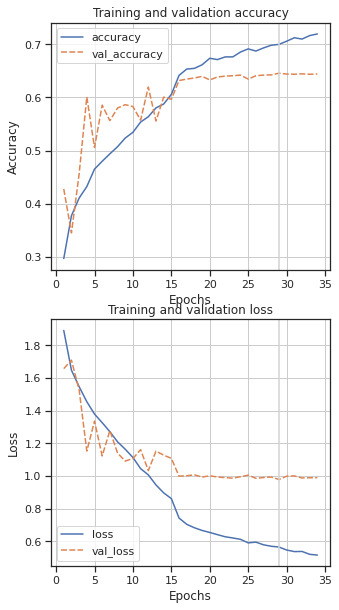

In [ ]:
history = run_model(model, 'experiment_inception', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)
plot_model_performance(history)

80/80 [==============================] - 8s 93ms/step - loss: 0.9789 - accuracy: 0.6307
Test loss: 0.979
Test accuracy: 0.631
Precision: 0.464636532264668
Recall: 0.5252162085052445
F1-Score: 0.48776028584804887
Accuracy on Test Data: 0.63%

              precision    recall  f1-score   support

           0       0.32      0.55      0.40        88
           1       0.61      0.64      0.62       333
           2       0.41      0.51      0.45       263
           3       0.16      0.24      0.19        25
           4       0.50      0.55      0.53       453
           5       0.85      0.71      0.77      1288
           6       0.29      0.31      0.30        64
           7       0.58      0.69      0.63        26

    accuracy                           0.63      2540
   macro avg       0.46      0.53      0.49      2540
weighted avg       0.67      0.63      0.64      2540



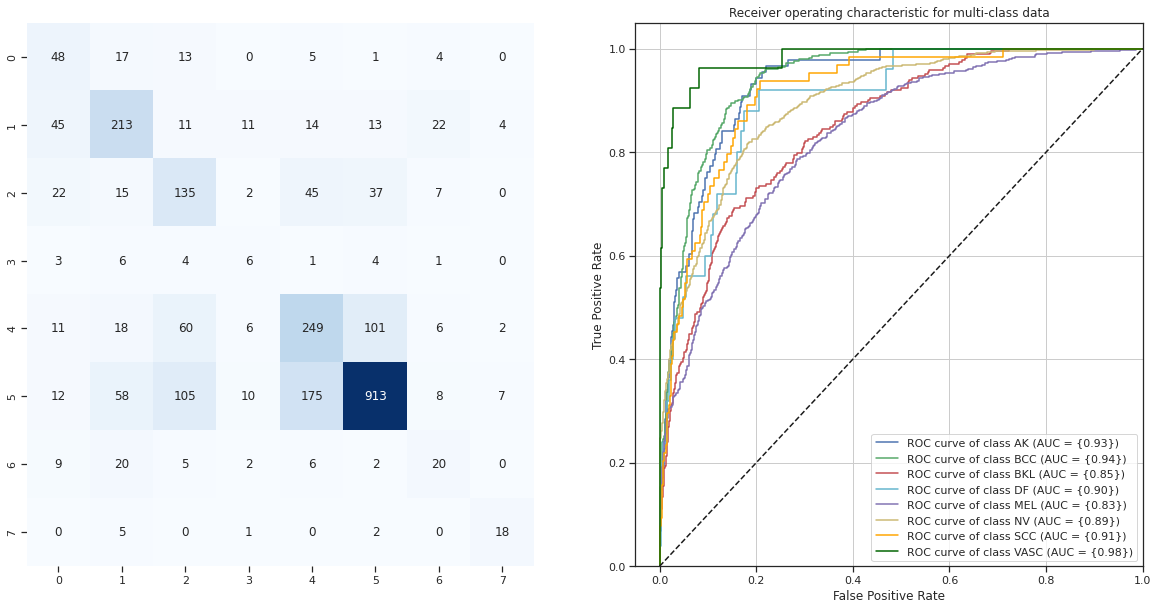

In [ ]:
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_inception.h5')
evaluate_model(model)